# **👑DATA SCHOOL PROJECT06**  
**┗ 코호트 분석**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 코호트 분석
```  

> **프로젝트유형**

```
▶ 이커머스 데이터 활용 코호트 분석

```

> **학습목표**

```
▶ 코호트 분석의 원리와 방법론에 대한 깊은 이해 습득
▶ 이커머스 데이터의 특성을 파악하고, 고객의 재구매, 이탈 등의 패턴을 분석하는 능력 개발
▶ 다양한 기간과 세그먼트에 따른 고객 행동의 변화를 시각적으로 표현하는 능력 향상
▶ 코호트 분석 결과를 바탕으로 마케팅 및 영업 전략을 제안할 수 있는 능력 개발
```

> **예상 결과물**

```
▶ 각 코호트별 재구매, 이탈률 등의 지표 분석 보고서
▶ 시간에 따른 고객 행동 변화를 나타내는 시각화 자료 (히트맵, 그래프 등)
▶ 주요 코호트의 특징 및 추세 파악에 대한 문서화
▶ 분석 결과를 기반으로 한 마케팅 및 영업 전략 제안서
```


## **문제상황 Introduction**
---
> **시나리오**

```
기업 Zeta는 자사의 이커머스 사이트에서의 고객 행동 패턴을 더 잘 이해하고자 한다. 최근, 고객들의 재구매율이 떨어지는 경향을 보이며, 이에 대한 원인과
대응 방안을 찾고자 한다. 마케팅 팀은 고객의 재구매 및 이탈 패턴을 분석하기 위해 "코호트 분석" 프로젝트를 시작하기로 결정한다.
마케팅팀은 고객들의 최초 구매 월을 기준으로 코호트를 형성한다. 예를 들어, 1월에 처음 구매한 고객들, 2월에 처음 구매한 고객들 등으로 그룹을 나눈다.
이러한 코호트 그룹별로 이후의 월별 재구매율, 이탈률 등의 지표를 분석한다. 이 때, CohortIndex라는 지표를 활용하여 각 코호트가 유입된 이후로 지난
개월 수를 표시한다. 예를 들어, 1월에 처음 구매한 고객 그룹의 3월 재구매율을 보고자 할 때, CohortIndex는 '3'이 된다.
프로젝트 진행 중, 마케팅팀은 특정 코호트에서 재구매율이 높게 나타나는 패턴과 이탈률이 높게 나타나는
패턴을 발견한다. 이러한 분석을 통해, 그 원인이 무엇인지, 어떤 마케팅 전략이나 프로모션 활동이 효과적이었는지 파악하고자 한다.
```  

> **문제정의**

```
▶ 고객들의 재구매율 감소
```  

> **기대효과**

```
▶ 재구매율 감소 및 이탈률 증가 원인을 파악하고, 프로모션 활동의 성과를 점검하여 문제 해소
```

> **해결방안**

```
▶ 코호트 분석과 주문 데이터를 활용하여 재구매율과 이탈률의 증감 원인 파악
```

> **성과측정**  

```
▶ 마케팅 전략이나 프로모션 활동 전개 후 재구매율 변화 모니터링
```

> **데이터 살펴보기**

|Column|Description|
|:---|:---|
|InvoiceNo|송장번호|
|StockCode|재고코드|
|Description|상세설명|
|Quantity|수량|
|InvoiceDate|송장날짜|
|UnitPrice|개당가격|
|CustomerID|고객ID|
|Country|나라|


In [2]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/제로베이스/제로베이스_개인프로젝트/06_이커머스')
os.getcwd()

'/content/drive/MyDrive/제로베이스/제로베이스_개인프로젝트/06_이커머스'

In [4]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('P_PJT06_DATA.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


---
# 데이터 파악하기

In [ ]:
df.Description.nunique()

4223

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


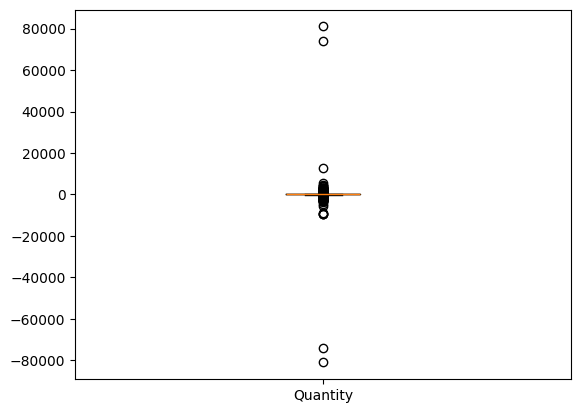

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParams['font.family'] = 'NanumGothic'

plt.boxplot(df['Quantity'])
plt.xticks([1], ['Quantity'])
plt.show()

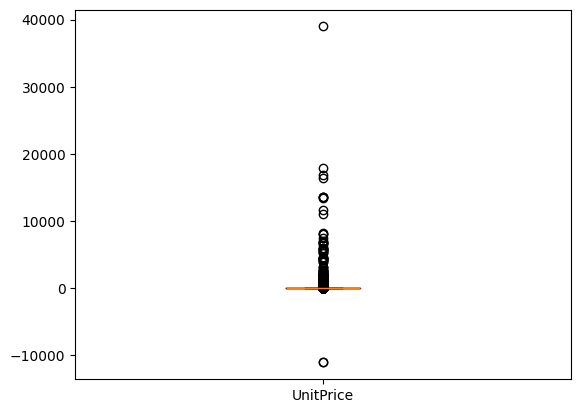

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParams['font.family'] = 'NanumGothic'

plt.boxplot(df['UnitPrice'])
plt.xticks([1], ['UnitPrice'])
plt.show()

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.shape

(541909, 8)

In [ ]:
# CustomerID가 null이면 코호트로 추적이 불가능할 것이라 생각하여,
# CustomerID가 null인 행은 모두 drop
df = df.dropna(axis=0, subset='CustomerID')

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


---
# 코호트 분석 준비
## CohortIndex 구하기

CustomerID마다 CohortIndex(최초구매일로부터 몇달 지났는지) 구하기

In [ ]:
df2 = df.copy()
df2.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

In [ ]:
df2['InvoiceDate_year_month'] = df2['InvoiceDate'].dt.strftime('%Y-%m')

In [ ]:
df2.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [ ]:
df3 = df2.groupby(['CustomerID'], as_index=False)['InvoiceDate_year_month'].value_counts()
df3['InvoiceDate_year_month'] = pd.to_datetime(df3['InvoiceDate_year_month'])
df3

,CustomerID,InvoiceDate_year_month,count
0,12346.0,2011-01-01,2
1,12347.0,2011-10-01,47
2,12347.0,2010-12-01,31
3,12347.0,2011-01-01,29
4,12347.0,2011-04-01,24
...,...,...,...
13670,18283.0,2011-05-01,44
13671,18283.0,2011-10-01,40
13672,18283.0,2011-02-01,30
13673,18287.0,2011-10-01,41


In [ ]:
cohort = (df3.groupby('CustomerID')['InvoiceDate_year_month'].max().dt.year \
- df3.groupby('CustomerID')['InvoiceDate_year_month'].min().dt.year) * 12 \
+ (df3.groupby('CustomerID')['InvoiceDate_year_month'].max().dt.month - \
   df3.groupby('CustomerID')['InvoiceDate_year_month'].min().dt.month)

cohort = cohort.reset_index()
cohort.head()

,CustomerID,InvoiceDate_year_month
0,12346.0,0
1,12347.0,12
2,12348.0,9
3,12349.0,0
4,12350.0,0


In [ ]:
cohort.columns = ['CustomerID', 'Cohort_index']

In [ ]:
cohort.head()

,CustomerID,Cohort_index
0,12346.0,0
1,12347.0,12
2,12348.0,9
3,12349.0,0
4,12350.0,0


In [ ]:
merged_df = df2.merge(cohort[['CustomerID', 'Cohort_index']], on='CustomerID', how='left')

In [ ]:
merged_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,Cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2



---
> CohortIndex로 그룹지어 월별 주문수 구하기

In [ ]:
cohort_monthly = merged_df.groupby(['Cohort_index', 'InvoiceDate_year_month'], as_index=False)['InvoiceNo'].size()
cohort_monthly

,Cohort_index,InvoiceDate_year_month,size
0,0,2010-12,2411
1,0,2011-01,1808
2,0,2011-02,1537
3,0,2011-03,2451
4,0,2011-04,1784
...,...,...,...
164,12,2011-08,6843
165,12,2011-09,8533
166,12,2011-10,8051
167,12,2011-11,12057


In [ ]:
cohort_monthly.columns = ['Cohort_index', 'InvoiceDate_year_month', 'Order_cnt']

In [ ]:
cohort_monthly.head(1)

,Cohort_index,InvoiceDate_year_month,Order_cnt
0,0,2010-12,2411


---

# 코호트 분석 준비 2 (주문 건별 코호트 따로 계산)

In [ ]:
df3 = df.copy()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])
df3['InvoiceDate_year_month'] = df3['InvoiceDate'].dt.strftime('%Y-%m')

In [ ]:
first_invoicedate = df3.groupby('CustomerID', as_index=False)['InvoiceDate_year_month'].min()
first_invoicedate.columns = ['CustomerID', 'First_InvoiceDate']
first_invoicedate.head()

,CustomerID,First_InvoiceDate
0,12346.0,2011-01
1,12347.0,2010-12
2,12348.0,2010-12
3,12349.0,2011-11
4,12350.0,2011-02


In [ ]:
df3 = pd.merge(df3, first_invoicedate, how = 'left', on = 'CustomerID')
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,First_InvoiceDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12


In [ ]:
df3['InvoiceDate_year_month'] = pd.to_datetime(df3['InvoiceDate_year_month'])
df3['First_InvoiceDate'] = pd.to_datetime(df3['First_InvoiceDate'])

In [ ]:
df3['Cohort_Each'] = (df3['InvoiceDate_year_month'].dt.year \
- df3['First_InvoiceDate'].dt.year) * 12 \
+ (df3['InvoiceDate_year_month'].dt.month - \
   df3['First_InvoiceDate'].dt.month)

In [ ]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,First_InvoiceDate,Cohort_Each
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0


In [ ]:
cohort_each_monthly = df3.groupby(['Cohort_Each', 'InvoiceDate_year_month'], as_index=False)['InvoiceNo'].size()
cohort_each_monthly.head()

,Cohort_Each,InvoiceDate_year_month,size
0,0,2010-12-01,26850
1,0,2011-01-01,11031
2,0,2011-02-01,8788
3,0,2011-03-01,11151
4,0,2011-04-01,7320


In [ ]:
cohort_each_monthly.columns = ['Cohort_Each', 'InvoiceDate_year_month', 'Order_cnt']

## Cohort each별 재주문율 구하기

In [ ]:
cohort_each_monthly['Prev_Order_cnt'] = cohort_each_monthly.groupby('Cohort_Each')['Order_cnt'].shift(1)
cohort_each_monthly.head(1)

,Cohort_Each,InvoiceDate_year_month,Order_cnt,Prev_Order_cnt
0,0,2010-12-01,26850,NaN


In [ ]:
cohort_each_monthly.head(5)

,Cohort_Each,InvoiceDate_year_month,Order_cnt,Prev_Order_cnt
0,0,2010-12-01,26850,NaN
1,0,2011-01-01,11031,26850.0
2,0,2011-02-01,8788,11031.0
3,0,2011-03-01,11151,8788.0
4,0,2011-04-01,7320,11151.0


In [ ]:
cohort_each_monthly['Reorder_rate'] = cohort_each_monthly['Order_cnt'] / cohort_each_monthly['Prev_Order_cnt']
cohort_each_monthly['Reorder_rate'] = cohort_each_monthly['Reorder_rate'].fillna(0)

In [ ]:
cohort_each_monthly.head(3)

,Cohort_Each,InvoiceDate_year_month,Order_cnt,Prev_Order_cnt,Reorder_rate
0,0,2010-12-01,26850,NaN,0.000000
1,0,2011-01-01,11031,26850.0,0.410838
2,0,2011-02-01,8788,11031.0,0.796664


In [ ]:
cohort_each_monthly['InvoiceDate_year_month'] = cohort_each_monthly['InvoiceDate_year_month'].dt.strftime('%Y-%m')

In [ ]:
cohort_each_monthly.head(3)

,Cohort_Each,InvoiceDate_year_month,Order_cnt,Prev_Order_cnt,Reorder_rate
0,0,2010-12,26850,NaN,0.000000
1,0,2011-01,11031,26850.0,0.410838
2,0,2011-02,8788,11031.0,0.796664


In [ ]:
cohort_each_retention = cohort_each_monthly.set_index(['InvoiceDate_year_month', 'Cohort_Each'])['Reorder_rate'].unstack()

In [ ]:
cohort_each_retention

Cohort_Each,0,1,2,3,4,5,6,7,8,9,10,11,12
InvoiceDate_year_month,,,,,,,,,,,,,
2010-12,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01,0.410838,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02,0.796664,0.219833,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03,1.268889,0.622074,0.334531,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04,0.656443,0.993280,0.630534,0.195772,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05,0.831557,0.970907,1.289623,1.029945,0.378914,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06,0.928536,0.782578,0.532026,0.973792,0.580021,0.262003,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,0.888889,0.836153,0.669676,0.546257,1.098287,0.621712,0.243469,0.000000,NaN,NaN,NaN,NaN,NaN
2011-08,0.959793,0.559105,0.823596,0.708237,0.572660,1.033560,0.765625,0.248038,0.000000,NaN,NaN,NaN,NaN


## 히트맵 시각화

[Text(0, 0.5, '2010-12'),
 Text(0, 1.5, '2011-01'),
 Text(0, 2.5, '2011-02'),
 Text(0, 3.5, '2011-03'),
 Text(0, 4.5, '2011-04'),
 Text(0, 5.5, '2011-05'),
 Text(0, 6.5, '2011-06'),
 Text(0, 7.5, '2011-07'),
 Text(0, 8.5, '2011-08'),
 Text(0, 9.5, '2011-09'),
 Text(0, 10.5, '2011-10'),
 Text(0, 11.5, '2011-11'),
 Text(0, 12.5, '2011-12')]

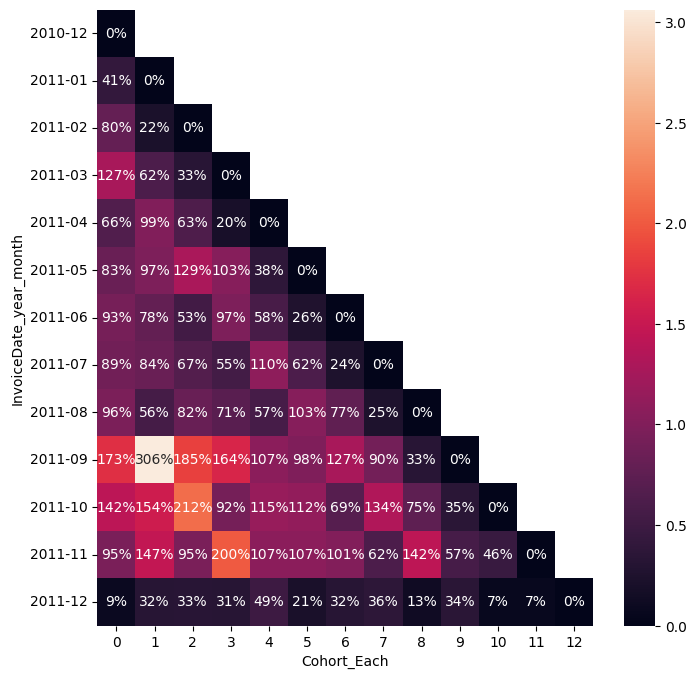

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.gcf().set_size_inches(8,8)
ax = sns.heatmap(cohort_each_retention, annot=True, fmt='.0%')
ax.set_yticklabels(labels = cohort_each_retention.index, rotation = 0)

## 각 월의 9일까지의 지표 비교

In [ ]:
df3.groupby('InvoiceDate_year_month').size()

,0
InvoiceDate_year_month,
2010-12-01,26850
2011-01-01,21912
2011-02-01,20363
2011-03-01,27822
2011-04-01,23198
2011-05-01,28908
2011-06-01,27836
2011-07-01,27502
2011-08-01,27662


In [ ]:
df3[df3['InvoiceDate_year_month'].dt.day <= 9].shape

(406829, 12)

In [ ]:
df3[df3['InvoiceDate_year_month'].dt.day > 9].shape

(0, 12)

In [ ]:
df.shape

(406829, 8)

In [ ]:
df_9 = df3[df3['InvoiceDate_year_month'].dt.day <= 9]
df_9.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,First_InvoiceDate,Cohort_Each,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,0,22.00


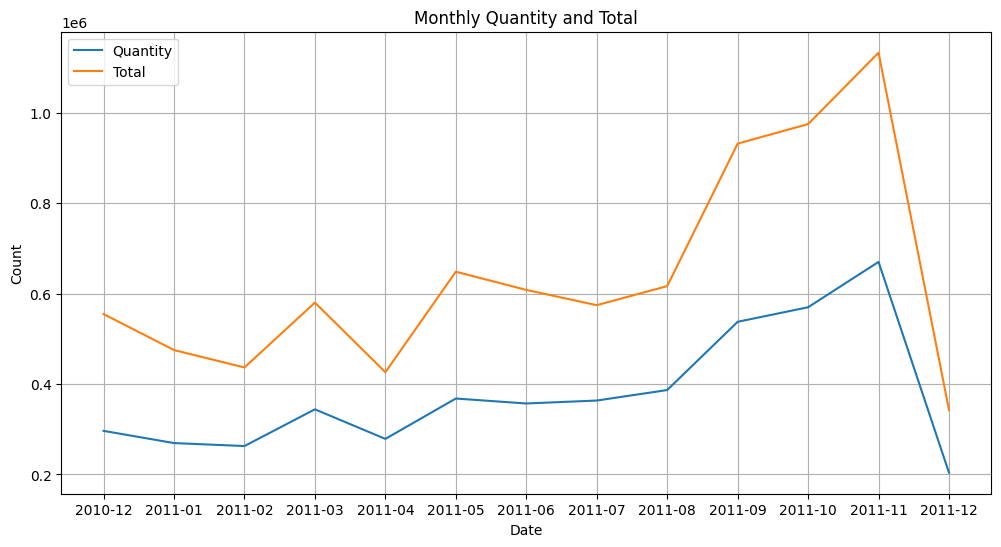

In [ ]:
df_qty_total_9 = df_9.groupby('InvoiceDate_year_month', as_index=False).agg({'Quantity' : 'sum',
                                                                    'Total' : 'sum'})

df_qty_total_9['InvoiceDate_year_month'] = df_qty_total_9['InvoiceDate_year_month'].dt.strftime('%Y-%m')
plt.figure(figsize=(12, 6))
plt.plot(df_qty_total_9['InvoiceDate_year_month'], df_qty_total_9['Quantity'], label='Quantity')
plt.plot(df_qty_total_9['InvoiceDate_year_month'], df_qty_total_9['Total'], label='Total')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Monthly Quantity and Total')
plt.legend()
plt.grid(True)
plt.show()

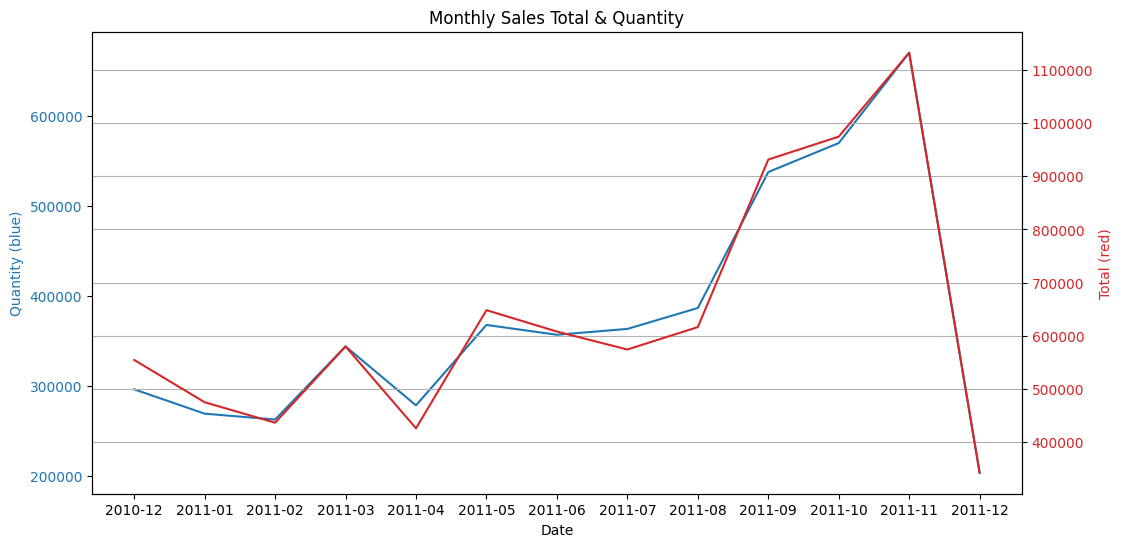

In [ ]:
import matplotlib.pyplot as plt

# Figure와 Axes 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 y축 (Quantity)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity (blue)', color=color)
ax1.plot(df_qty_total_9['InvoiceDate_year_month'], df_qty_total_9['Quantity'], color=color, label='Quantity')
ax1.tick_params(axis='y', labelcolor=color)

# 두 번째 y축 (Total)
ax2 = ax1.twinx()  # x축을 공유하는 두 번째 축 생성
color = 'tab:red'
ax2.set_ylabel('Total (red)', color=color)
ax2.plot(df_qty_total_9['InvoiceDate_year_month'], df_qty_total_9['Total'], color=color, label='Total')
ax2.tick_params(axis='y', labelcolor=color)
ax2.ticklabel_format(axis='y', useOffset=False, style='plain')

# 그래프 출력
plt.title('Monthly Sales Total & Quantity')
plt.grid(True)
plt.show()

## 월별 가입 고객 수

In [ ]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,First_InvoiceDate,Cohort_Each,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0,20.34


In [ ]:
df3['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
df_register = df3.groupby('First_InvoiceDate', as_index=False).size()
df_register.head(3)

,First_InvoiceDate,size
0,2010-12-01,177272
1,2011-01-01,49047
2,2011-02-01,30136


Text(0.5, 1.0, 'Monthly Registered Customers')

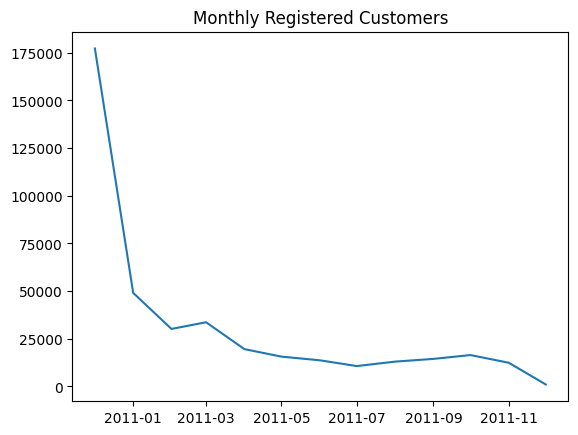

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_register['First_InvoiceDate'], df_register['size'])
plt.title('Monthly Registered Customers')

## 전체 고객 & 신규 고객 구매 상품 TOP5 비교

In [ ]:
cohort_each_monthly.head(3)

,Cohort_Each,InvoiceDate_year_month,Order_cnt,Prev_Order_cnt,Reorder_rate
0,0,2010-12,26850,NaN,0.000000
1,0,2011-01,11031,26850.0,0.410838
2,0,2011-02,8788,11031.0,0.796664


In [ ]:
df3.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,First_InvoiceDate,Cohort_Each
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0


In [ ]:
df3['Total'] = df3['UnitPrice'] * df3['Quantity']

In [ ]:
df3['InvoiceDate_year_month'] = df3['InvoiceDate_year_month'].dt.strftime('%Y-%m')
df3['First_InvoiceDate'] = df3['First_InvoiceDate'].dt.strftime('%Y-%m')

In [ ]:
df3.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,First_InvoiceDate,Cohort_Each,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,0,20.34


In [ ]:
df3['InvoiceDate_year_month'] = pd.to_datetime(df3['InvoiceDate_year_month'])
df3['First_InvoiceDate'] = pd.to_datetime(df3['First_InvoiceDate'])

In [ ]:
df_recent = df3[(df3['First_InvoiceDate'].dt.year == 2011) & (df3['First_InvoiceDate'].dt.month >= 6) \
            & (df3['InvoiceDate_year_month'].dt.year == 2011) & (df3['InvoiceDate_year_month'].dt.month >= 9)]

In [ ]:
df_recent.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,First_InvoiceDate,Cohort_Each,Total
232077,565087,23085,ANTIQUE SILVER BAUBLE LAMP,4,2011-09-01 10:03:00,10.40,13276.0,United Kingdom,2011-09-01,2011-09-01,0,41.60
232078,565087,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2,2011-09-01 10:03:00,7.95,13276.0,United Kingdom,2011-09-01,2011-09-01,0,15.90
232079,565087,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,3,2011-09-01 10:03:00,4.95,13276.0,United Kingdom,2011-09-01,2011-09-01,0,14.85


In [ ]:
stock_rank = pd.DataFrame(df3['StockCode'].value_counts()).reset_index().sort_values(by='count', ascending=False)
stock_rank.head()

,StockCode,count
0,85123A,2077
1,22423,1905
2,85099B,1662
3,84879,1418
4,47566,1416


In [ ]:
list(stock_rank.head()['StockCode'])

['85123A', '22423', '85099B', '84879', '47566']

In [ ]:
df_stock_rank = df3[df3['StockCode'].isin(list(stock_rank.head()['StockCode']))]
df_stock_rank.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,First_InvoiceDate,Cohort_Each,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0,15.30
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,2010-12-01,0,54.08
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0,15.30
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0,15.30
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 09:57:00,1.65,16029.0,United Kingdom,2010-12-01,2010-12-01,0,165.00


In [ ]:
df_stock_rank_group = df_stock_rank.groupby(['InvoiceDate_year_month'])['StockCode'].value_counts().reset_index()
#df_stock_rank_group.head()
df_stock_rank_group['InvoiceDate_year_month'] = df_stock_rank_group['InvoiceDate_year_month'].dt.strftime('%Y-%m')
df_stock_rank_pivot = df_stock_rank_group.pivot_table(index='InvoiceDate_year_month', columns='StockCode', values='count')
df_stock_rank_pivot.head()

StockCode,22423,47566,84879,85099B,85123A
InvoiceDate_year_month,,,,,
2010-12,154.0,23.0,94.0,88.0,213.0
2011-01,132.0,45.0,71.0,83.0,167.0
2011-02,130.0,61.0,71.0,89.0,130.0
2011-03,198.0,129.0,107.0,121.0,174.0
2011-04,173.0,165.0,110.0,89.0,160.0


In [ ]:
stock_rank_recent = pd.DataFrame(df_recent['StockCode'].value_counts()).reset_index().sort_values(by='count', ascending=False)
df_stock_rank_recent = df_recent[df_recent['StockCode'].isin(list(stock_rank.head()['StockCode']))]

df_stock_rank_recent_group = df_stock_rank_recent.groupby(['InvoiceDate_year_month'])['StockCode'].value_counts().reset_index()
#df_stock_rank_group.head()
df_stock_rank_recent_group['InvoiceDate_year_month'] = df_stock_rank_recent_group['InvoiceDate_year_month'].dt.strftime('%Y-%m')
df_stock_rank_recent_pivot = df_stock_rank_recent_group.pivot_table(index='InvoiceDate_year_month', columns='StockCode', values='count')
df_stock_rank_recent_pivot.head()

StockCode,22423,47566,84879,85099B,85123A
InvoiceDate_year_month,,,,,
2011-09,48.0,38.0,53.0,40.0,41.0
2011-10,53.0,33.0,55.0,37.0,53.0
2011-11,66.0,23.0,70.0,51.0,76.0
2011-12,13.0,4.0,13.0,9.0,15.0


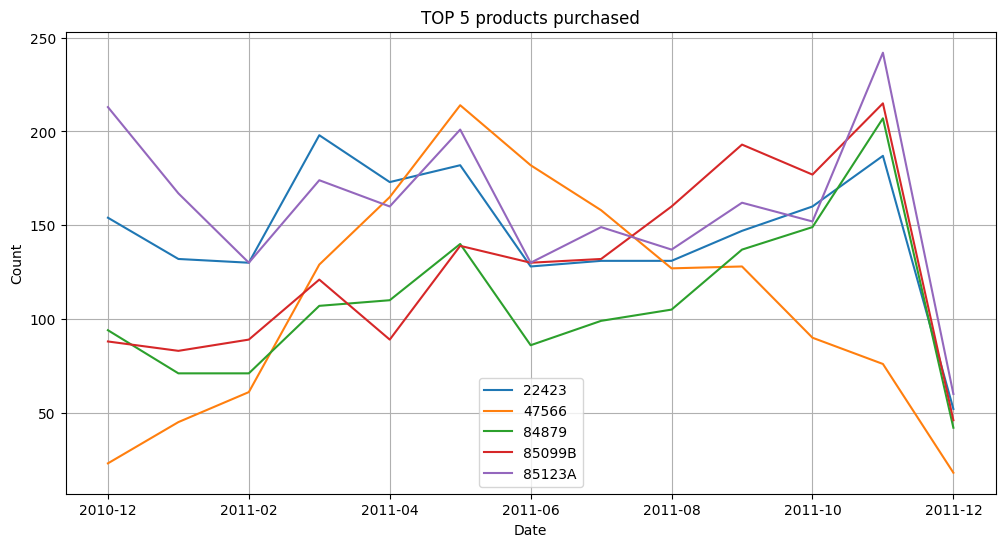

In [ ]:
df_stock_rank_pivot.plot(figsize=(12, 6))
plt.title('TOP 5 products purchased')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

new_index = pd.Index(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
                                '2011-07', '2011-08'], name='index_name')
df_stock_rank_recent_pivot.loc['2010-12'] = np.nan
df_stock_rank_recent_pivot.loc['2011-01'] = np.nan
df_stock_rank_recent_pivot.loc['2011-02'] = np.nan
df_stock_rank_recent_pivot.loc['2011-03'] = np.nan
df_stock_rank_recent_pivot.loc['2011-04'] = np.nan
df_stock_rank_recent_pivot.loc['2011-05'] = np.nan
df_stock_rank_recent_pivot.loc['2011-06'] = np.nan
df_stock_rank_recent_pivot.loc['2011-07'] = np.nan
df_stock_rank_recent_pivot.loc['2011-08'] = np.nan

df_stock_rank_recent_pivot = df_stock_rank_recent_pivot.sort_index()
df_stock_rank_recent_pivot

StockCode,22423,47566,84879,85099B,85123A
InvoiceDate_year_month,,,,,
2010-12,NaN,NaN,NaN,NaN,NaN
2011-01,NaN,NaN,NaN,NaN,NaN
2011-02,NaN,NaN,NaN,NaN,NaN
2011-03,NaN,NaN,NaN,NaN,NaN
2011-04,NaN,NaN,NaN,NaN,NaN
2011-05,NaN,NaN,NaN,NaN,NaN
2011-06,NaN,NaN,NaN,NaN,NaN
2011-07,NaN,NaN,NaN,NaN,NaN
2011-08,NaN,NaN,NaN,NaN,NaN


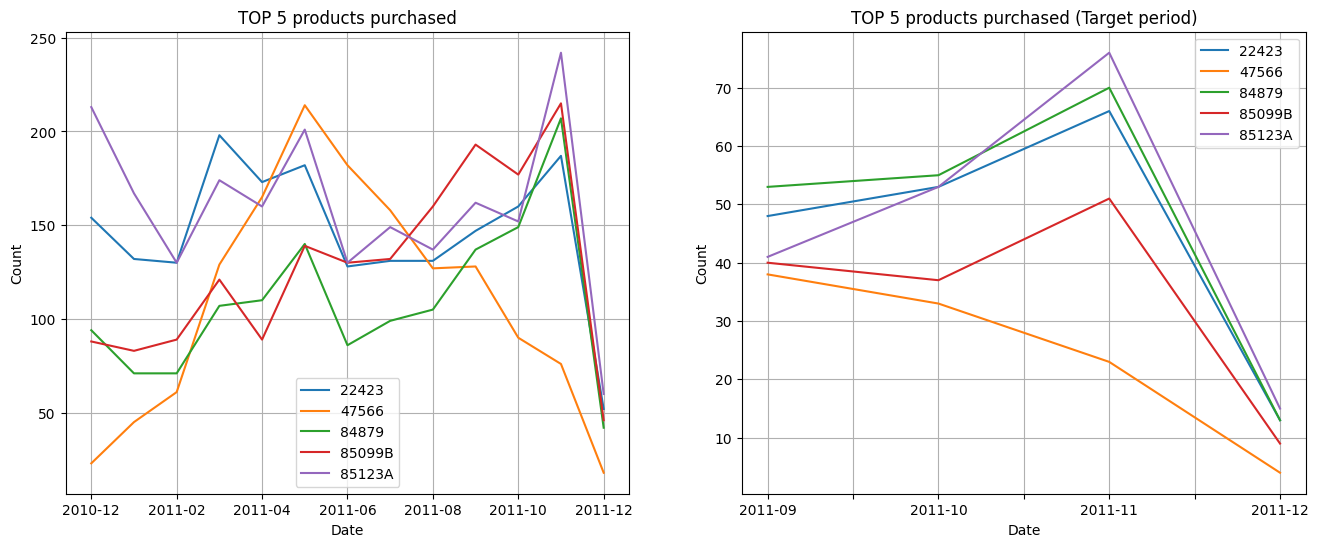

In [ ]:
import matplotlib.pyplot as plt

# subplot 생성 (1행 2열)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 첫 번째 subplot에 첫 번째 그래프 그리기
df_stock_rank_pivot.plot(ax=axes[0])
axes[0].set_title('TOP 5 products purchased')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Count')
axes[0].legend(loc='best')
axes[0].grid(True)

# 두 번째 subplot에 두 번째 그래프 그리기
df_stock_rank_recent_pivot.plot(ax=axes[1])
axes[1].set_title('TOP 5 products purchased (Target period)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Count')
axes[1].legend(loc='best')
axes[1].grid(True)

# 전체 그림 저장 (선택 사항)
plt.savefig('two_graphs.png')

# 그림 보여주기
plt.show()

## 전체 고객 & 신규 고객 주문량 + 주문금액 비교

In [ ]:
df3.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,First_InvoiceDate,Cohort_Each,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,0,22.00


In [ ]:
df_qty_total = df3.groupby('InvoiceDate_year_month', as_index=False).agg({'Quantity' : 'sum',
                                                                    'Total' : 'sum'})
df_qty_total.head()

,InvoiceDate_year_month,Quantity,Total
0,2010-12-01,296362,554604.020
1,2011-01-01,269379,475074.380
2,2011-02-01,262833,436546.150
3,2011-03-01,344012,579964.610
4,2011-04-01,278585,426047.851


In [ ]:
df_recent_qty_total = df_recent.groupby('InvoiceDate_year_month', as_index=False).agg({'Quantity' : 'sum',
                                                                    'Total' : 'sum'})
df_recent_qty_total.head()

,InvoiceDate_year_month,Quantity,Total
0,2011-09-01,138803,217721.831
1,2011-10-01,157584,256844.090
2,2011-11-01,195658,308257.900
3,2011-12-01,55879,94300.950


In [ ]:
df_qty_total['InvoiceDate_year_month'] = df_qty_total['InvoiceDate_year_month'].dt.strftime('%Y-%m')
df_recent_qty_total['InvoiceDate_year_month'] = df_recent_qty_total['InvoiceDate_year_month'].dt.strftime('%Y-%m')

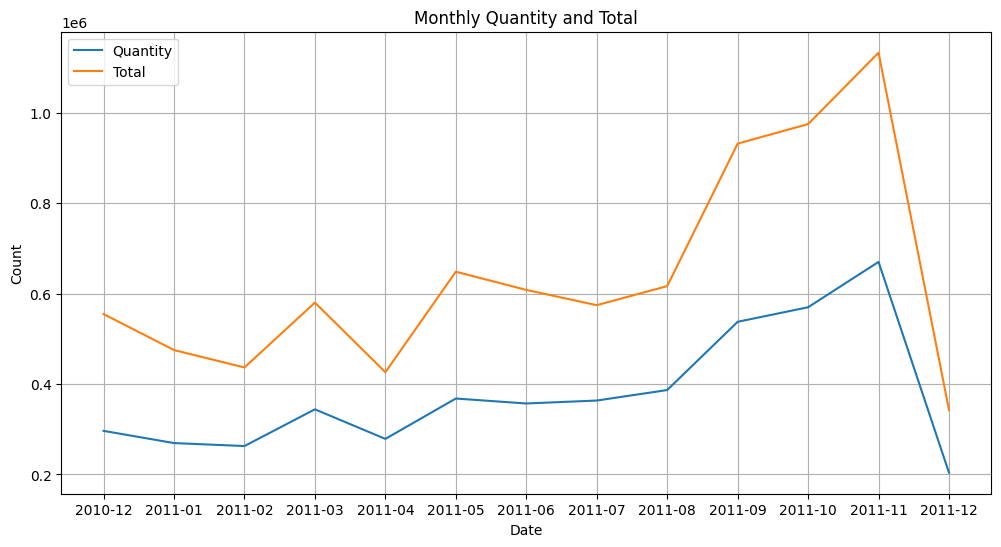

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_qty_total['InvoiceDate_year_month'], df_qty_total['Quantity'], label='Quantity')
plt.plot(df_qty_total['InvoiceDate_year_month'], df_qty_total['Total'], label='Total')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Monthly Quantity and Total')
plt.legend()
plt.grid(True)
plt.show()

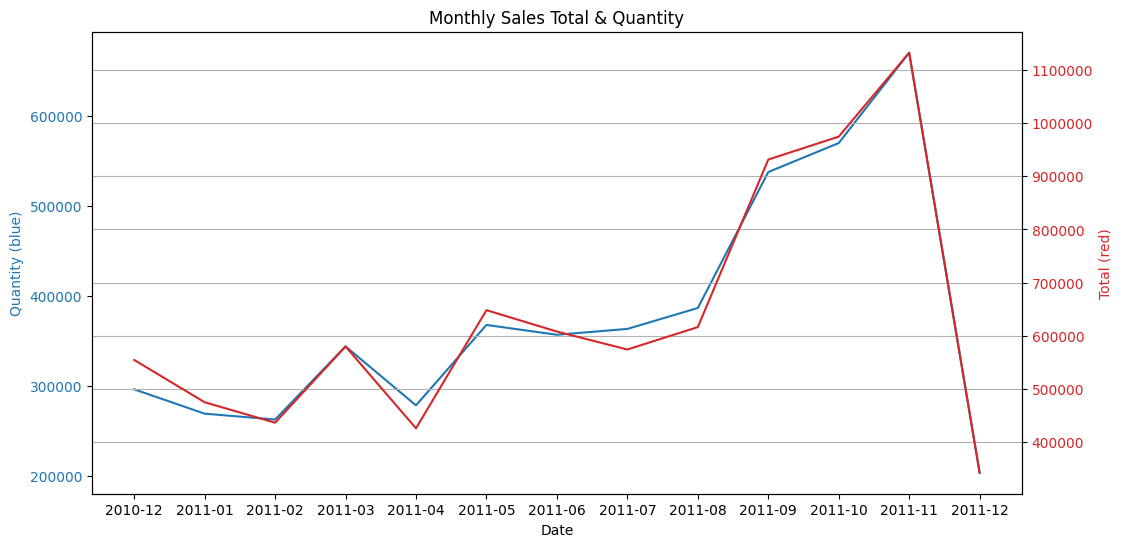

In [ ]:
import matplotlib.pyplot as plt

# Figure와 Axes 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 y축 (Quantity)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity (blue)', color=color)
ax1.plot(df_qty_total['InvoiceDate_year_month'], df_qty_total['Quantity'], color=color, label='Quantity')
ax1.tick_params(axis='y', labelcolor=color)

# 두 번째 y축 (Total)
ax2 = ax1.twinx()  # x축을 공유하는 두 번째 축 생성
color = 'tab:red'
ax2.set_ylabel('Total (red)', color=color)
ax2.plot(df_qty_total['InvoiceDate_year_month'], df_qty_total['Total'], color=color, label='Total')
ax2.tick_params(axis='y', labelcolor=color)
ax2.ticklabel_format(axis='y', useOffset=False, style='plain')

# 그래프 출력
plt.title('Monthly Sales Total & Quantity')
plt.grid(True)
plt.show()

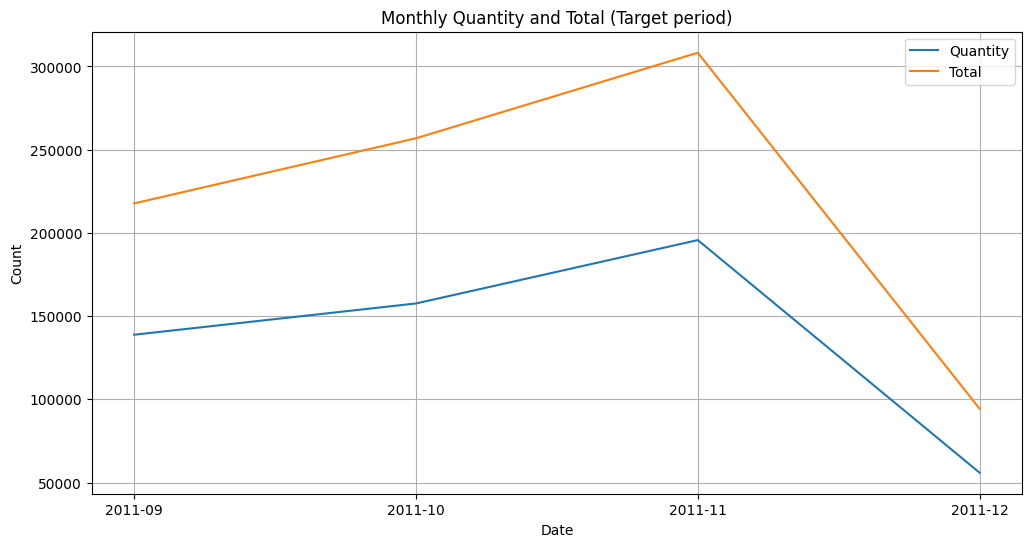

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(['InvoiceDate_year_month'], df_recent_qty_total['Quantity'], label='Quantity')
plt.plot(df_recent_qty_total['InvoiceDate_year_month'], df_recent_qty_total['Total'], label='Total')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Monthly Quantity and Total (Target period)')
plt.legend()
plt.grid(True)
plt.show()

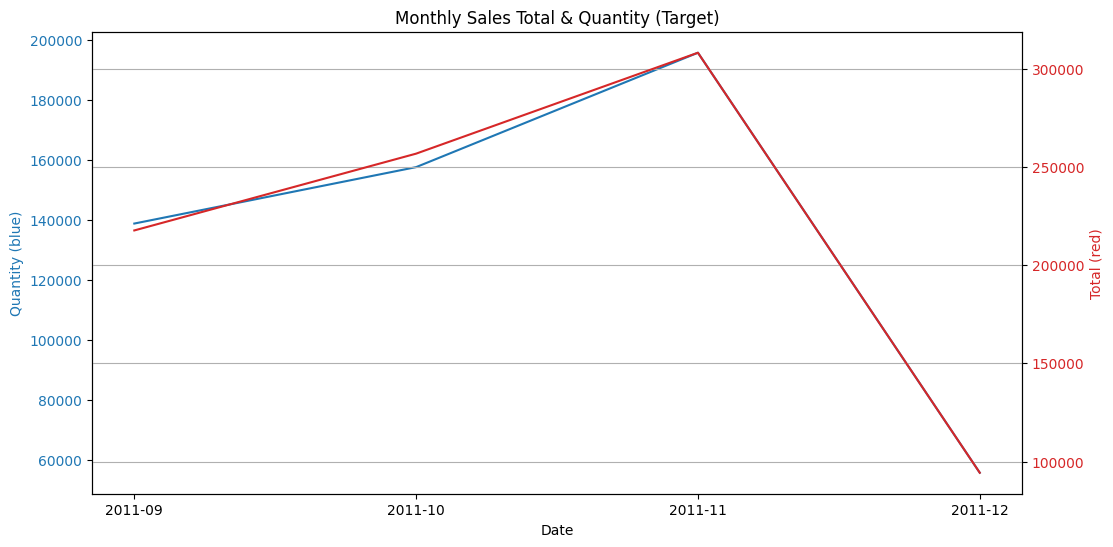

In [ ]:
import matplotlib.pyplot as plt

# Figure와 Axes 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 y축 (Quantity)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity (blue)', color=color)
ax1.plot(df_recent_qty_total['InvoiceDate_year_month'], df_recent_qty_total['Quantity'], color=color, label='Quantity')
ax1.tick_params(axis='y', labelcolor=color)

# 두 번째 y축 (Total)
ax2 = ax1.twinx()  # x축을 공유하는 두 번째 축 생성
color = 'tab:red'
ax2.set_ylabel('Total (red)', color=color)
ax2.plot(df_recent_qty_total['InvoiceDate_year_month'], df_recent_qty_total['Total'], color=color, label='Total')
ax2.tick_params(axis='y', labelcolor=color)
ax2.ticklabel_format(axis='y', useOffset=False, style='plain')

# 그래프 출력
plt.title('Monthly Sales Total & Quantity (Target)')
plt.grid(True)
plt.show()

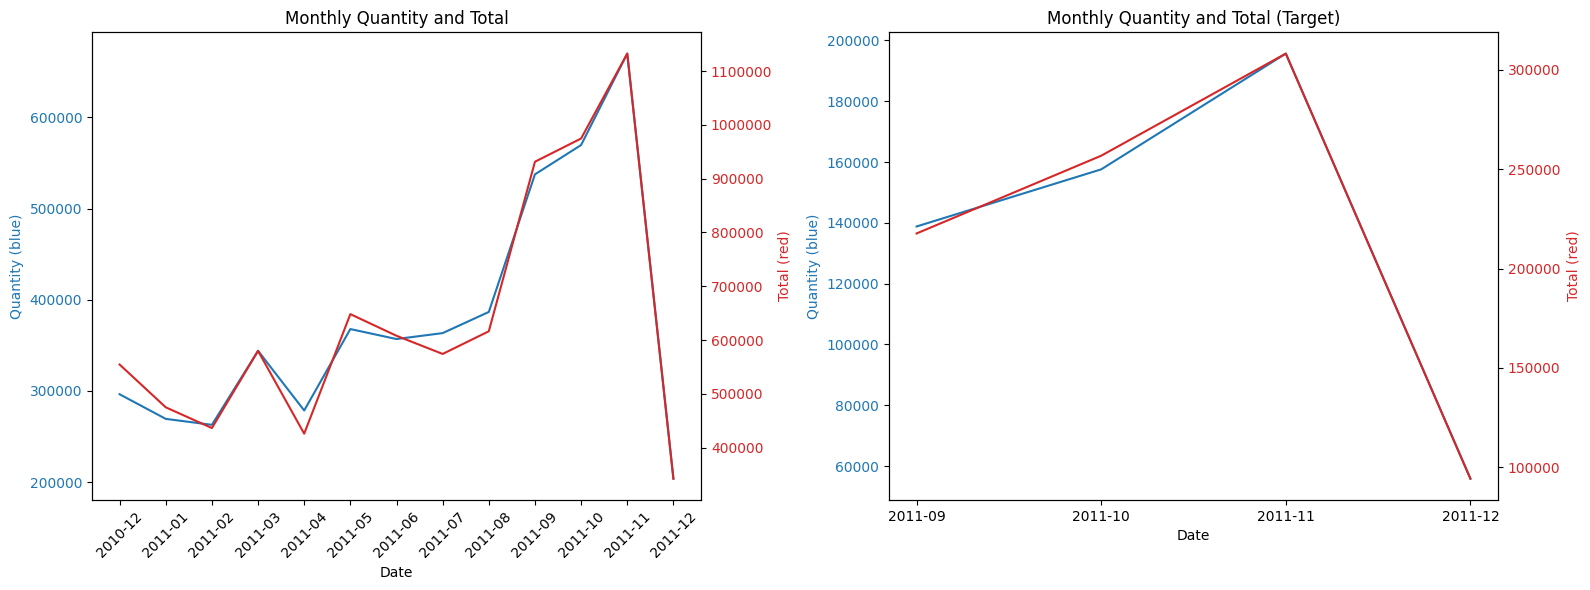

In [ ]:
import matplotlib.pyplot as plt

# Figure와 2개의 Axes 생성
fig, (ax1, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 왼쪽 서브플롯 (첫 번째 그래프)
# 첫 번째 y축 (Quantity)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity (blue)', color=color)
ax1.plot(df_qty_total['InvoiceDate_year_month'], df_qty_total['Quantity'], color=color, label='Quantity')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(labels = df_qty_total['InvoiceDate_year_month'], rotation = 45)

# 두 번째 y축 (Total)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total (red)', color=color)
ax2.plot(df_qty_total['InvoiceDate_year_month'], df_qty_total['Total'], color=color, label='Total')
ax2.tick_params(axis='y', labelcolor=color)
ax2.ticklabel_format(axis='y', useOffset=False, style='plain')
ax1.set_title('Monthly Quantity and Total')

# 오른쪽 서브플롯 (두 번째 그래프)
# 첫 번째 y축 (Quantity)
color = 'tab:blue'
ax3.set_xlabel('Date')
ax3.set_ylabel('Quantity (blue)', color=color)
ax3.plot(df_recent_qty_total['InvoiceDate_year_month'], df_recent_qty_total['Quantity'], color=color, label='Quantity')
ax3.tick_params(axis='y', labelcolor=color)

# 두 번째 y축 (Total)
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Total (red)', color=color)
ax4.plot(df_recent_qty_total['InvoiceDate_year_month'], df_recent_qty_total['Total'], color=color, label='Total')
ax4.tick_params(axis='y', labelcolor=color)
ax4.ticklabel_format(axis='y', useOffset=False, style='plain')
ax3.set_title('Monthly Quantity and Total (Target)')

# 그래프 출력
plt.tight_layout()
plt.show()

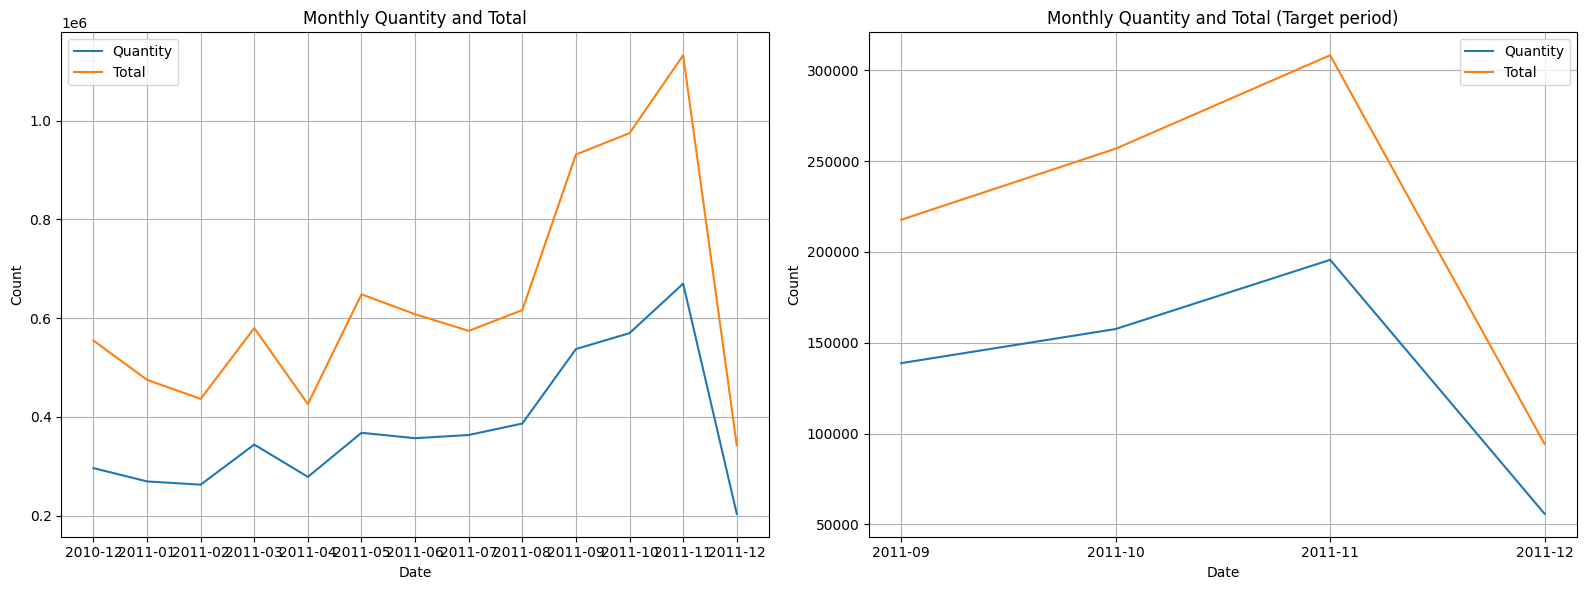

In [ ]:
import matplotlib.pyplot as plt


# subplot 생성 (1행 2열)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 1번째 subplot에 첫 번째 그래프 그리기
axes[0].plot(df_qty_total['InvoiceDate_year_month'], df_qty_total['Quantity'], label='Quantity')
axes[0].plot(df_qty_total['InvoiceDate_year_month'], df_qty_total['Total'], label='Total')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Count')
axes[0].set_title('Monthly Quantity and Total')
axes[0].legend()
axes[0].grid(True)

# 2번째 subplot에 두 번째 그래프 그리기
axes[1].plot(df_recent_qty_total['InvoiceDate_year_month'], df_recent_qty_total['Quantity'], label='Quantity')
axes[1].plot(df_recent_qty_total['InvoiceDate_year_month'], df_recent_qty_total['Total'], label='Total')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Count')
axes[1].set_title('Monthly Quantity and Total (Target period)')
axes[1].legend()
axes[1].grid(True)

# 전체 그림 보여주기
plt.tight_layout()  # subplot 간 간격 조절 (선택 사항)
plt.show()

## 가입 국가 비교

In [ ]:
df_recent.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,First_InvoiceDate,Cohort_Each,Total
232077,565087,23085,ANTIQUE SILVER BAUBLE LAMP,4,2011-09-01 10:03:00,10.40,13276.0,United Kingdom,2011-09-01,2011-09-01,0,41.60
232078,565087,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2,2011-09-01 10:03:00,7.95,13276.0,United Kingdom,2011-09-01,2011-09-01,0,15.90
232079,565087,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,3,2011-09-01 10:03:00,4.95,13276.0,United Kingdom,2011-09-01,2011-09-01,0,14.85


In [ ]:
top5_country_recent = df_recent['Country'].value_counts().reset_index().head()
top5_country = df3['Country'].value_counts().reset_index().head()
top5_country.head()

,Country,count
0,United Kingdom,361878
1,Germany,9495
2,France,8491
3,EIRE,7485
4,Spain,2533


([<matplotlib.patches.Wedge at 0x7956ba2be740>,
 [Text(-1.0846785506398395, 0.18295475337322445, 'United Kingdom'),
  Text(1.0609607177182185, -0.29045198477346096, 'Germany'),
  Text(1.0896368402864933, -0.15063716769266133, 'France'),
  Text(1.0982888831123603, -0.0613313071098616, 'Switzerland'),
  Text(1.0998112151233335, -0.020378692032041443, 'Portugal')],
 [Text(-0.5916428458035488, 0.09979350183994061, '94.7%'),
  Text(0.5787058460281191, -0.15842835533097868, '2.1%'),
  Text(0.5943473674289963, -0.08216572783236072, '2.0%'),
  Text(0.5990666635158328, -0.03345344024174269, '0.6%'),
  Text(0.5998970264309091, -0.011115650199295331, '0.6%')])

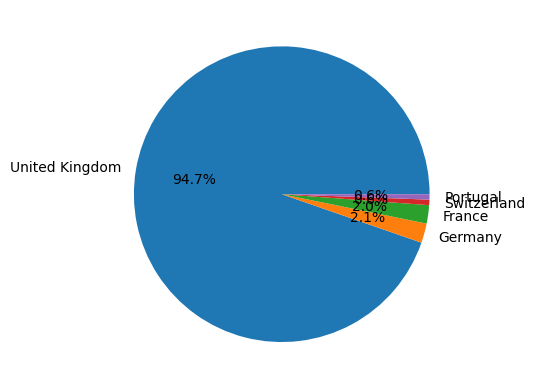

In [ ]:
plt.pie(top5_country_recent['count'],
        labels = top5_country_recent['Country'],
        autopct = '%.1f%%')

([<matplotlib.patches.Wedge at 0x7956ba11e5f0>,
 [Text(-1.0721135773923829, 0.24611476422780354, 'United Kingdom'),
  Text(1.0236418757295245, -0.4026876087650832, 'Germany'),
  Text(1.0710668647679815, -0.25063074670935076, 'France'),
  Text(1.0943793917965938, -0.11105740322426827, 'EIRE'),
  Text(1.0997708840454228, -0.02245000235967947, 'Spain')],
 [Text(-0.5847892240322088, 0.13424441685152919, '92.8%'),
  Text(0.558350114034286, -0.21964778659913625, '2.4%'),
  Text(0.5842182898734444, -0.13670768002328224, '2.2%'),
  Text(0.5969342137072329, -0.06057676539505541, '1.9%'),
  Text(0.5998750276611396, -0.012245455832552437, '0.6%')])

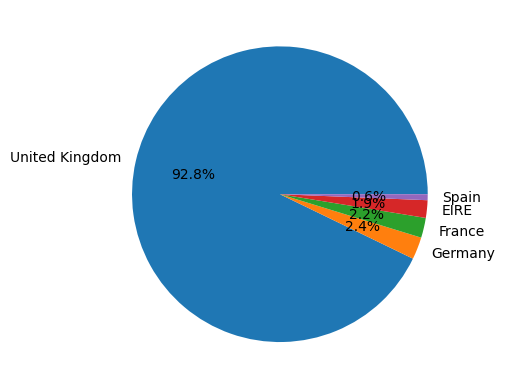

In [ ]:
plt.pie(top5_country['count'],
        labels = top5_country['Country'],
        autopct = '%.1f%%')

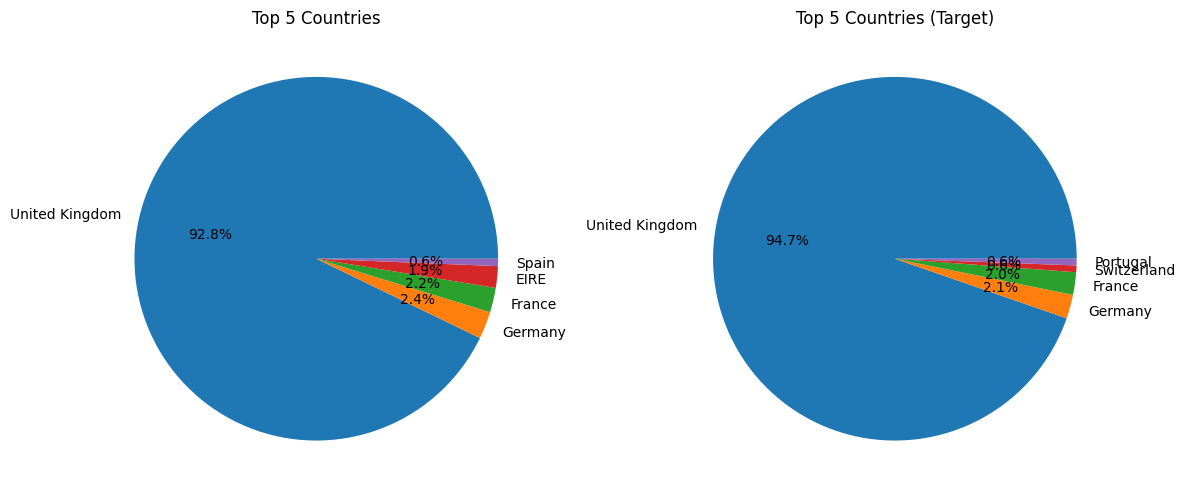

In [ ]:
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[1].pie(top5_country_recent['count'], labels=top5_country_recent['Country'], autopct='%.1f%%')
axes[1].set_title('Top 5 Countries (Target)')

axes[0].pie(top5_country['count'], labels=top5_country['Country'], autopct='%.1f%%')
axes[0].set_title('Top 5 Countries')

# 전체 그림 조정
plt.tight_layout()
plt.show()

## 가입 국가별 주문 금액, 주문량 비교

In [ ]:
df3.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,First_InvoiceDate,Cohort_Each,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0,15.3


In [ ]:
df_top5_country = df3[df3['Country'].isin(list(top5_country['Country']))]
df_top5_country_recent = df_recent[df_recent['Country'].isin(list(top5_country_recent['Country']))]

In [ ]:
df_top5_country.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,First_InvoiceDate,Cohort_Each,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0,15.3


In [ ]:
monthly_total_qty_by_country = df_top5_country.groupby(['InvoiceDate_year_month', 'Country'], as_index=False).agg({'Total' : 'sum', 'Quantity' : 'sum'})

monthly_total_qty_by_country_recent = df_top5_country_recent.groupby(['InvoiceDate_year_month', 'Country'], as_index=False).agg({'Total' : 'sum', 'Quantity' : 'sum'})

monthly_total_by_country_pivot = pd.pivot_table(monthly_total_qty_by_country,
                                                    index = 'InvoiceDate_year_month',
                                                    columns = 'Country',
                                                values = 'Total')
monthly_qty_by_country_pivot = pd.pivot_table(monthly_total_qty_by_country,
                                                    index = 'InvoiceDate_year_month',
                                                    columns = 'Country',
                                                values = 'Quantity')

monthly_total_by_country_recent_pivot = pd.pivot_table(monthly_total_qty_by_country_recent,
                                                    index = 'InvoiceDate_year_month',
                                                    columns = 'Country',
                                                values = 'Total')
monthly_qty_by_country_recent_pivot = pd.pivot_table(monthly_total_qty_by_country_recent,
                                                    index = 'InvoiceDate_year_month',
                                                    columns = 'Country',
                                                values = 'Quantity')


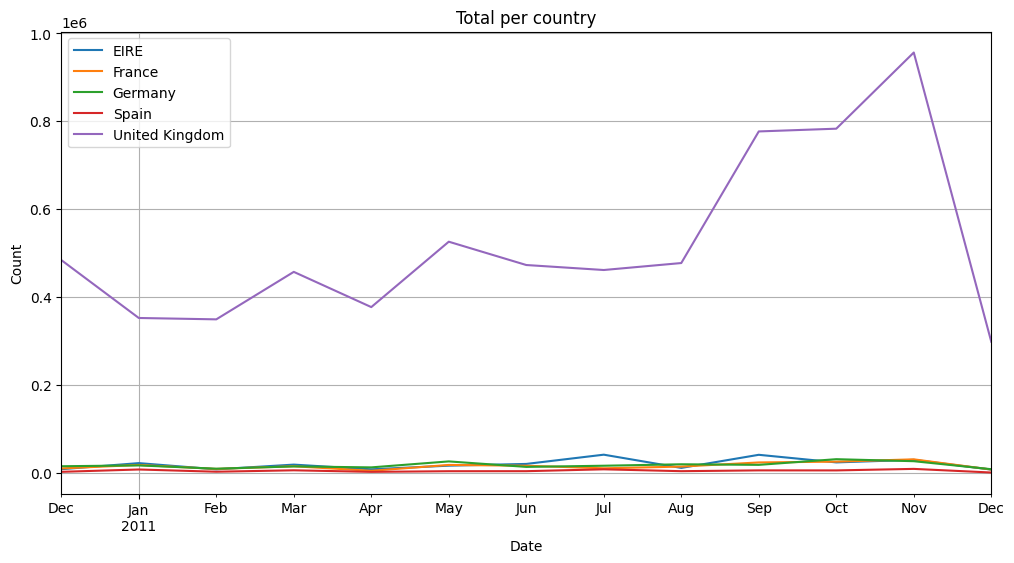

In [ ]:
monthly_total_by_country_pivot.plot(figsize=(12, 6))
plt.title('Total per country')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(loc='best')
plt.grid(True)
plt.show()

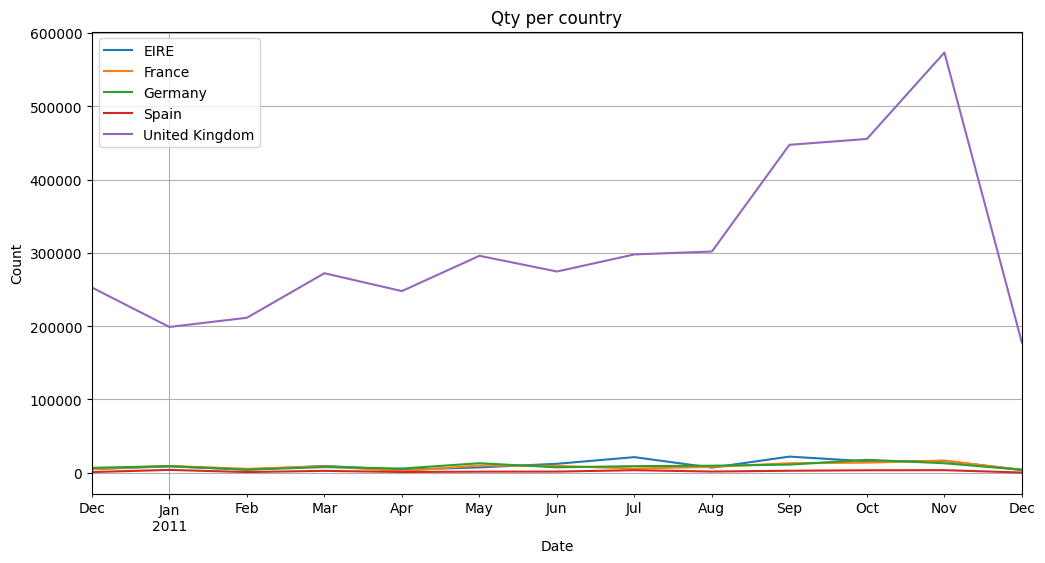

In [ ]:
monthly_qty_by_country_pivot.plot(figsize=(12, 6))
plt.title('Qty per country')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Figure와 2개의 Axes 생성
fig, (ax1, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 왼쪽 서브플롯 (첫 번째 그래프)
# 첫 번째 y축 (Quantity)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity (blue)', color=color)
ax1.plot(df_qty_total['InvoiceDate_year_month'], df_qty_total['Quantity'], color=color, label='Quantity')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(labels = df_qty_total['InvoiceDate_year_month'], rotation = 45)

# 두 번째 y축 (Total)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total (red)', color=color)
ax2.plot(['InvoiceDate_year_month'], df_qty_total['Total'], color=color, label='Total')
ax2.tick_params(axis='y', labelcolor=color)
ax2.ticklabel_format(axis='y', useOffset=False, style='plain')
ax1.set_title('Monthly Quantity and Total')

# 오른쪽 서브플롯 (두 번째 그래프)
# 첫 번째 y축 (Quantity)
color = 'tab:blue'
ax3.set_xlabel('Date')
ax3.set_ylabel('Quantity (blue)', color=color)
ax3.plot(df_recent_qty_total['InvoiceDate_year_month'], df_recent_qty_total['Quantity'], color=color, label='Quantity')
ax3.tick_params(axis='y', labelcolor=color)

# 두 번째 y축 (Total)
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Total (red)', color=color)
ax4.plot(df_recent_qty_total['InvoiceDate_year_month'], df_recent_qty_total['Total'], color=color, label='Total')
ax4.tick_params(axis='y', labelcolor=color)
ax4.ticklabel_format(axis='y', useOffset=False, style='plain')
ax3.set_title('Monthly Quantity and Total (Target)')

# 그래프 출력
plt.tight_layout()
plt.show()

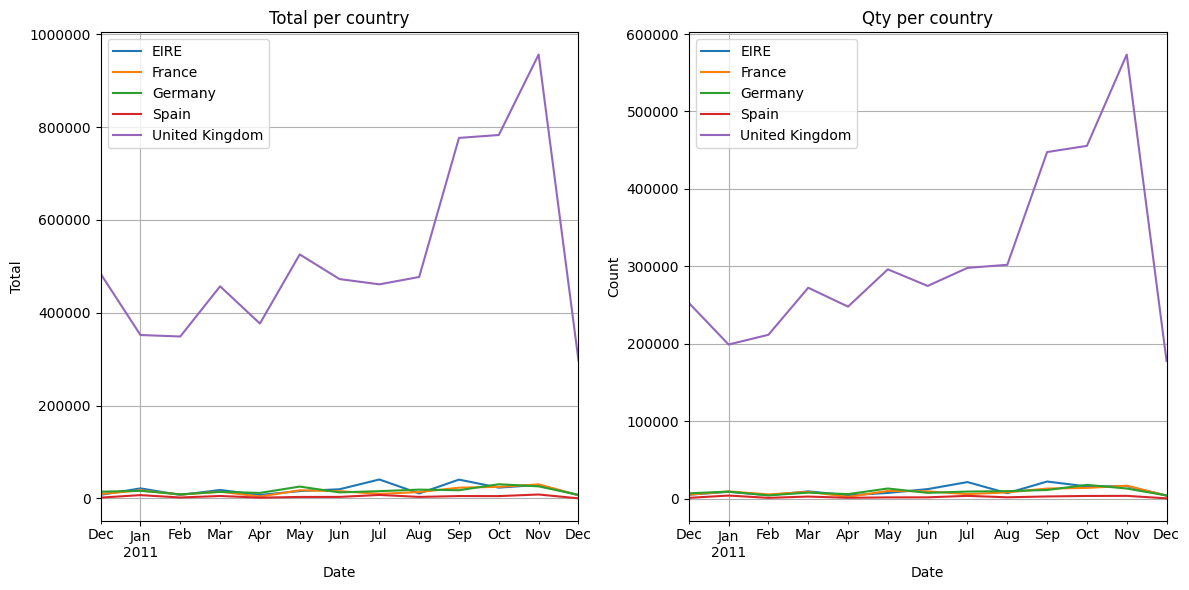

In [ ]:
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 첫 번째 서브플롯 (총합)
monthly_total_by_country_pivot.plot(ax=ax1, figsize=(12, 6))
ax1.set_title('Total per country')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total')
ax1.ticklabel_format(axis='y', useOffset=False, style='plain')
ax1.legend(loc='best')
ax1.grid(True)

# 두 번째 서브플롯 (수량)
monthly_qty_by_country_pivot.plot(ax=ax2, figsize=(12, 6))
ax2.set_title('Qty per country')
ax2.set_xlabel('Date')
ax2.set_ylabel('Count')
ax2.legend(loc='best')
ax2.grid(True)

plt.tight_layout()
plt.show()

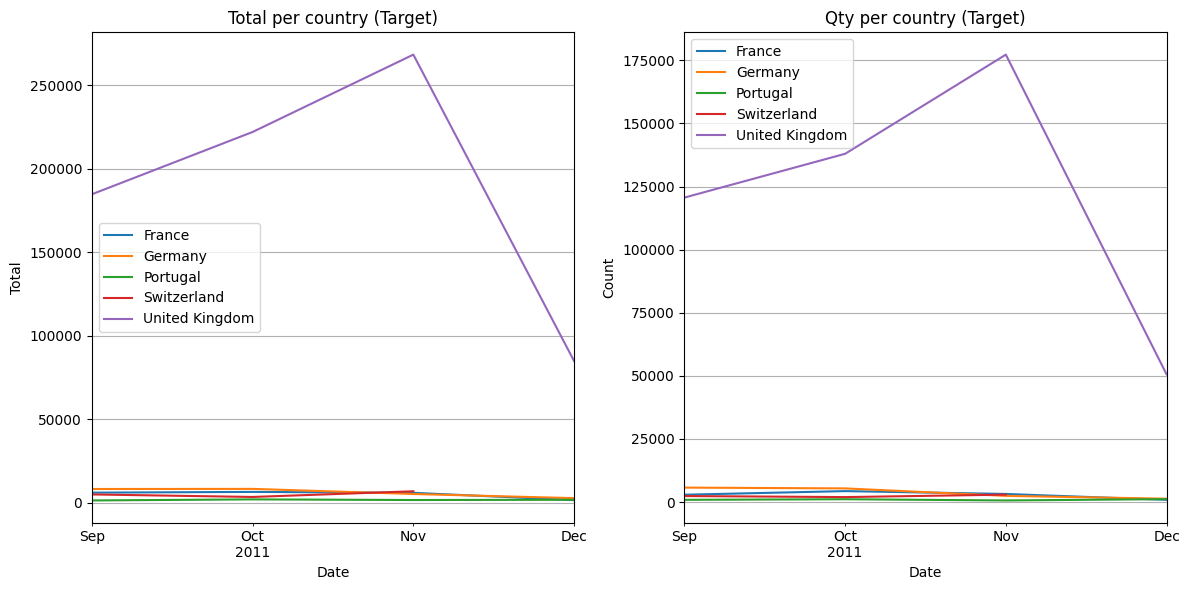

In [ ]:
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 첫 번째 서브플롯 (총합)
monthly_total_by_country_recent_pivot.plot(ax=ax1, figsize=(12, 6))
ax1.set_title('Total per country (Target)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total')
ax1.legend(loc='best')
ax1.grid(True)

# 두 번째 서브플롯 (수량)
monthly_qty_by_country_recent_pivot.plot(ax=ax2, figsize=(12, 6))
ax2.set_title('Qty per country (Target)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Count')
ax2.legend(loc='best')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Figure와 2개의 Axes 생성
fig, (ax1, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 왼쪽 서브플롯 (첫 번째 그래프)
# 첫 번째 y축 (Quantity)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity (blue)', color=color)
ax1.plot(df_qty_total['InvoiceDate_year_month'], df_qty_total['Quantity'], color=color, label='Quantity')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(labels = df_qty_total['InvoiceDate_year_month'], rotation = 45)

# 두 번째 y축 (Total)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total (red)', color=color)
ax2.plot(df_qty_total['InvoiceDate_year_month'], df_qty_total['Total'], color=color, label='Total')
ax2.tick_params(axis='y', labelcolor=color)
ax2.ticklabel_format(axis='y', useOffset=False, style='plain')
ax1.set_title('Monthly Quantity and Total')

# 오른쪽 서브플롯 (두 번째 그래프)
# 첫 번째 y축 (Quantity)
color = 'tab:blue'
ax3.set_xlabel('Date')
ax3.set_ylabel('Quantity (blue)', color=color)
ax3.plot(df_recent_qty_total['InvoiceDate_year_month'], df_recent_qty_total['Quantity'], color=color, label='Quantity')
ax3.tick_params(axis='y', labelcolor=color)

# 두 번째 y축 (Total)
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Total (red)', color=color)
ax4.plot(df_recent_qty_total['InvoiceDate_year_month'], df_recent_qty_total['Total'], color=color, label='Total')
ax4.tick_params(axis='y', labelcolor=color)
ax4.ticklabel_format(axis='y', useOffset=False, style='plain')
ax3.set_title('Monthly Quantity and Total (Target)')

# 그래프 출력
plt.tight_layout()
plt.show()

# 기대효과

In [ ]:
df3.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,First_InvoiceDate,Cohort_Each,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0,20.34


In [ ]:
df3.groupby('InvoiceDate_year_month', as_index=False)['Total'].sum()

,InvoiceDate_year_month,Total
0,2010-12-01,554604.020
1,2011-01-01,475074.380
2,2011-02-01,436546.150
3,2011-03-01,579964.610
4,2011-04-01,426047.851
5,2011-05-01,648251.080
6,2011-06-01,608013.160
7,2011-07-01,574238.481
8,2011-08-01,616368.000
9,2011-09-01,931440.372


---
# Cohort index별 재주문율 구하기

In [ ]:
cohort_monthly['Prev_Order_cnt'] = cohort_monthly.groupby('Cohort_index')['Order_cnt'].shift(1)
cohort_monthly.head(1)

,Cohort_index,InvoiceDate_year_month,Order_cnt,Prev_Order_cnt
0,0,2010-12,2411,NaN


In [ ]:
cohort_monthly.head()

,Cohort_index,InvoiceDate_year_month,Order_cnt,Prev_Order_cnt
0,0,2010-12,2411,NaN
1,0,2011-01,1808,2411.0
2,0,2011-02,1537,1808.0
3,0,2011-03,2451,1537.0
4,0,2011-04,1784,2451.0


In [ ]:
cohort_monthly['Reorder_rate'] = cohort_monthly['Order_cnt'] / cohort_monthly['Prev_Order_cnt']

In [ ]:
cohort_monthly.head()

,Cohort_index,InvoiceDate_year_month,Order_cnt,Prev_Order_cnt,Reorder_rate
0,0,2010-12,2411,NaN,NaN
1,0,2011-01,1808,2411.0,0.749896
2,0,2011-02,1537,1808.0,0.850111
3,0,2011-03,2451,1537.0,1.594665
4,0,2011-04,1784,2451.0,0.727866


In [ ]:
cohort_monthly['Reorder_rate'] = cohort_monthly['Reorder_rate'].fillna(0)

In [ ]:
cohort_monthly.head()

,Cohort_index,InvoiceDate_year_month,Order_cnt,Prev_Order_cnt,Reorder_rate
0,0,2010-12,2411,NaN,0.000000
1,0,2011-01,1808,2411.0,0.749896
2,0,2011-02,1537,1808.0,0.850111
3,0,2011-03,2451,1537.0,1.594665
4,0,2011-04,1784,2451.0,0.727866


In [ ]:
cohort_retention = cohort_monthly.set_index(['InvoiceDate_year_month', 'Cohort_index'])['Reorder_rate'].unstack()

In [ ]:
cohort_retention

Cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
InvoiceDate_year_month,,,,,,,,,,,,,
2010-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01,0.749896,1.532609,0.304094,0.699411,2.364486,0.564815,0.488677,0.571805,1.346386,2.329897,2.432880,0.623666,0.594818
2011-02,0.850111,0.865248,2.081731,1.095506,0.666008,2.650273,1.404878,2.345622,1.856823,1.528761,0.578999,0.707232,0.849395
2011-03,1.594665,0.489071,0.771363,2.187179,1.985163,0.946392,2.001736,1.666994,2.493976,0.787988,0.989085,1.394722,1.314423
2011-04,0.727866,1.631285,1.556886,0.559203,1.002990,2.113290,1.143105,1.633471,0.485266,0.757117,0.719864,0.739850,0.841854
2011-05,0.876121,1.989726,0.698077,1.171908,1.684054,1.683505,1.506829,0.808802,0.921852,1.246210,1.573703,1.446457,1.294930
2011-06,1.012156,1.058520,1.446281,1.592129,0.853097,1.370484,0.883686,0.750669,0.910907,1.056934,0.834020,0.950829,0.925639
2011-07,1.343236,0.788618,0.908571,0.779775,1.546680,0.776139,0.564103,1.260844,1.101956,0.846225,0.876460,0.946736,1.080335
2011-08,0.942588,1.494845,1.647799,1.697406,0.950369,0.648820,0.989899,0.676249,1.251748,1.062024,1.232189,0.917553,0.999708


---
# Cohort index별 평균 주문 금액 추이 알아보기

In [ ]:
merged_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,Cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2


In [ ]:
# 단가 * 구매 수
merged_df['Sales'] = merged_df['UnitPrice'] * merged_df['Quantity']

In [ ]:
merged_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,Cohort_index,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2,22.00


In [ ]:
cohort_sales = merged_df.groupby('Cohort_index', as_index=False)['Sales'].mean()
cohort_sales.head()

,Cohort_index,Sales
0,0,15.197834
1,1,14.357369
2,2,13.957711
3,3,18.412905
4,4,15.230571


---
# Cohort index별 총 주문 금액 파악

In [ ]:
cohort_sales_sum = merged_df.groupby('Cohort_index',as_index=False)['Sales'].sum()
cohort_sales_sum

,Cohort_index,Sales
0,0,580572.461
1,1,191958.021
2,2,208458.410
3,3,227509.850
4,4,251411.041
5,5,252955.240
6,6,280761.110
7,7,370065.730
8,8,451066.241
9,9,491160.170


---
# Cohort_index별 고객 숫자

In [ ]:
# CustomerID와 cohort_index의 고유 조합만 남기기..
unique_customers = merged_df[['CustomerID', 'Cohort_index']].drop_duplicates()
unique_customers.head()

,CustomerID,Cohort_index
0,17850.0,2
9,13047.0,11
26,12583.0,12
46,13748.0,9
65,15100.0,1


In [ ]:
cohort_counts = unique_customers.groupby('Cohort_index').size()
cohort_counts.head()

,0
Cohort_index,
0,1572
1,263
2,222
3,179
4,188


In [ ]:
cohort_counts = cohort_counts.reset_index()
cohort_counts

,Cohort_index,0
0,0,1572
1,1,263
2,2,222
3,3,179
4,4,188
5,5,198
6,6,222
7,7,223
8,8,241
9,9,243


---
# Cohort index별 가입 국가 추이
> Cohort index별로 고객의 가입 국가 피봇 테이블로 나타내기

In [ ]:
merged_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,Cohort_index,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2,20.34


In [ ]:
unique_country = merged_df[['CustomerID', 'Cohort_index', 'Country']].drop_duplicates()

In [ ]:
unique_country.head()

,CustomerID,Cohort_index,Country
0,17850.0,2,United Kingdom
9,13047.0,11,United Kingdom
26,12583.0,12,France
46,13748.0,9,United Kingdom
65,15100.0,1,United Kingdom


In [ ]:
cohort_country = unique_country.groupby('Cohort_index', as_index=False)['Country'].value_counts()
cohort_country.head()

,Cohort_index,Country,count
0,0,United Kingdom,1420
1,0,France,29
2,0,Germany,26
3,0,Spain,11
4,0,Italy,8


In [ ]:
cohort_country.shape

(175, 3)

In [ ]:
cohort_country['Cohort_index'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [ ]:
cohort_country_pivot = cohort_country.pivot_table(index='Cohort_index',
                            columns = 'Country',
                           values = 'count')

In [ ]:
cohort_country_pivot.index

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Cohort_index')

In [ ]:
cohort_country_pivot = cohort_country_pivot.fillna(0)

In [ ]:
cohort_country_pivot

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
Cohort_index,,,,,,,,,,,,,,,,,,,,,
0,1.0,4.0,2.0,6.0,1.0,3.0,3.0,4.0,0.0,2.0,...,1.0,0.0,0.0,11.0,4.0,7.0,3.0,2.0,1420.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,238.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,195.0,0.0
3,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,157.0,0.0
4,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.0,1.0
5,0.0,2.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,177.0,0.0
6,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,201.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,203.0,0.0
8,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,224.0,0.0


> 각 국가마다 값의 mean을 구해서 내림차순으로 정렬

In [ ]:
sorted_country = cohort_country_pivot.mean().sort_values(ascending=False)

In [ ]:
sorted_country.head()

,0
Country,
United Kingdom,303.846154
Germany,7.307692
France,6.692308
Spain,2.384615
Belgium,1.923077


In [ ]:
sorted_country_pivot = cohort_country_pivot[sorted_country.index]
sorted_country_pivot

Country,United Kingdom,Germany,France,Spain,Belgium,Switzerland,Portugal,Italy,Finland,Austria,...,Bahrain,Czech Republic,Lithuania,Lebanon,RSA,Saudi Arabia,Singapore,Iceland,Brazil,European Community
Cohort_index,,,,,,,,,,,,,,,,,,,,,
0,1420.0,26.0,29.0,11.0,6.0,7.0,7.0,8.0,5.0,4.0,...,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,238.0,8.0,2.0,2.0,0.0,2.0,4.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,195.0,7.0,10.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,157.0,5.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,172.0,6.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,177.0,5.0,1.0,1.0,5.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,201.0,2.0,5.0,3.0,3.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,203.0,1.0,9.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,224.0,7.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
# Cohort index별 국가별 주문 수 파악

In [ ]:
merged_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year_month,Cohort_index,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2,20.34


In [ ]:
cohort_country_order = merged_df.groupby(['Cohort_index','Country'], as_index=False).size()

In [ ]:
cohort_country_order.head()

,Cohort_index,Country,size
0,0,Australia,30
1,0,Austria,94
2,0,Bahrain,17
3,0,Belgium,110
4,0,Brazil,32


In [ ]:
cohort_country_order_pivot = cohort_country_order.pivot_table(index = 'Cohort_index',
                                                              columns = 'Country',
                                                              values='size')

In [ ]:
cohort_country_order_pivot = cohort_country_order_pivot.fillna(0)

In [ ]:
cohort_country_order_pivot.head()

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
Cohort_index,,,,,,,,,,,,,,,,,,,,,
0,30.0,94.0,17.0,110.0,32.0,16.0,31.0,164.0,0.0,17.0,...,58.0,0.0,0.0,240.0,92.0,583.0,246.0,68.0,33721.0,134.0
1,10.0,0.0,0.0,0.0,0.0,135.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,78.0,0.0,85.0,0.0,0.0,12391.0,87.0
2,0.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,33.0,...,0.0,0.0,0.0,8.0,0.0,138.0,45.0,0.0,13369.0,0.0
3,0.0,34.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,61.0,...,0.0,0.0,0.0,121.0,0.0,144.0,0.0,0.0,11157.0,0.0
4,0.0,0.0,0.0,211.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15142.0,23.0


In [ ]:
sorted_country_order = cohort_country_order_pivot.mean().sort_values(ascending=False)
sorted_country_order.head()

,0
Country,
United Kingdom,27836.769231
Germany,730.384615
France,653.153846
EIRE,575.769231
Spain,194.846154


In [ ]:
sorted_country_order_pivot = cohort_country_order_pivot[sorted_country_order.index]
sorted_country_order_pivot

Country,United Kingdom,Germany,France,EIRE,Spain,Netherlands,Belgium,Switzerland,Portugal,Australia,...,Malta,United Arab Emirates,European Community,RSA,Lebanon,Lithuania,Brazil,Czech Republic,Bahrain,Saudi Arabia
Cohort_index,,,,,,,,,,,,,,,,,,,,,
0,33721.0,686.0,611.0,0.0,240.0,53.0,110.0,583.0,232.0,30.0,...,45.0,68.0,0.0,58.0,45.0,35.0,32.0,0.0,17.0,0.0
1,12391.0,262.0,59.0,0.0,78.0,0.0,0.0,85.0,169.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2,13369.0,339.0,834.0,0.0,8.0,0.0,0.0,138.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11157.0,273.0,164.0,0.0,121.0,0.0,41.0,144.0,86.0,0.0,...,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15142.0,639.0,189.0,0.0,0.0,0.0,211.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15291.0,658.0,69.0,0.0,23.0,0.0,461.0,0.0,97.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,14356.0,195.0,532.0,0.0,110.0,20.0,239.0,292.0,377.0,0.0,...,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19880.0,41.0,910.0,162.0,195.0,95.0,77.0,167.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25016.0,663.0,46.0,0.0,266.0,0.0,113.0,18.0,0.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
# Cohort index별 국가별 평균 주문 금액 파악

In [ ]:
cohort_country_mean_sales = merged_df.groupby(['Cohort_index', 'Country'], as_index=False)['Sales'].mean()

In [ ]:
cohort_country_mean_sales.columns

Index(['Cohort_index', 'Country', 'Sales'], dtype='object')

In [ ]:
cohort_country_mean_sales_pivot = cohort_country_mean_sales.pivot_table(index='Cohort_index',
                                                                        columns='Country',
                                                                        values='Sales').fillna(0)

In [ ]:
cohort_country_mean_sales_pivot.head()

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
Cohort_index,,,,,,,,,,,,,,,,,,,,,
0,58.698667,21.070851,32.258824,18.956818,35.7375,45.396250,115.491613,9.372073,0.0,34.035294,...,17.281207,0.000,0.0,11.066625,18.45163,26.617736,1.560772,27.974706,14.456581,4.077836
1,40.190000,0.000000,0.000000,0.000000,0.0000,21.778074,0.000000,0.000000,0.0,0.000000,...,0.000000,13.117,0.0,17.171538,0.00000,26.432353,0.000000,0.000000,13.166586,18.030345
2,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,46.218000,0.000000,0.0,10.610909,...,0.000000,0.000,0.0,25.975000,0.00000,24.689783,29.932667,0.000000,13.290863,0.000000
3,0.000000,61.185000,0.000000,20.738780,0.0000,0.000000,0.000000,0.000000,0.0,20.112787,...,0.000000,0.000,0.0,4.989339,0.00000,80.715903,0.000000,0.000000,17.419928,0.000000
4,0.000000,0.000000,0.000000,17.644550,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,14.485852,24.000000


In [ ]:
sorted_country_mean = cohort_country_mean_sales_pivot.mean().sort_values(ascending=False)
sorted_country_mean_pivot = cohort_country_mean_sales_pivot[sorted_country_mean.index]

In [ ]:
sorted_country_mean_pivot

Country,Japan,Denmark,Finland,Germany,Australia,France,Switzerland,Sweden,Spain,Channel Islands,...,Lebanon,Brazil,Bahrain,USA,United Arab Emirates,Iceland,Czech Republic,European Community,RSA,Saudi Arabia
Cohort_index,,,,,,,,,,,,,,,,,,,,,
0,54.618387,34.035294,25.226667,18.073834,58.698667,15.038543,26.617736,18.451630,11.066625,115.491613,...,37.641778,35.7375,32.258824,1.560772,27.974706,0.000000,0.000000,0.00000,17.281207,0.000
1,0.000000,0.000000,19.857500,52.104695,40.190000,17.009831,26.432353,0.000000,17.171538,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,13.117
2,45.371077,10.610909,23.243636,15.710118,0.000000,16.778705,24.689783,0.000000,25.975000,46.218000,...,0.000000,0.0000,0.000000,29.932667,0.000000,0.000000,0.000000,0.00000,0.000000,0.000
3,0.000000,20.112787,25.301111,24.020183,0.000000,19.827622,80.715903,0.000000,4.989339,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,21.17623,0.000000,0.000
4,367.200000,0.000000,0.000000,19.875931,0.000000,16.493228,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000
5,872.130000,36.597807,0.000000,13.346170,0.000000,15.267971,0.000000,21.837674,54.698261,18.537969,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000
6,0.000000,217.496944,24.676000,16.956667,0.000000,18.347914,20.562705,0.000000,23.647545,21.464091,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000
7,27.448889,24.962308,0.000000,20.267317,0.000000,25.873505,24.558623,0.000000,23.035026,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000
8,0.000000,0.000000,26.257333,22.200121,21.777228,18.181087,23.186667,0.000000,17.535000,22.260049,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000


---
# 분석 결과 시각화

# 재주문율 히트맵

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Cohort_index', ylabel='InvoiceDate_year_month'>

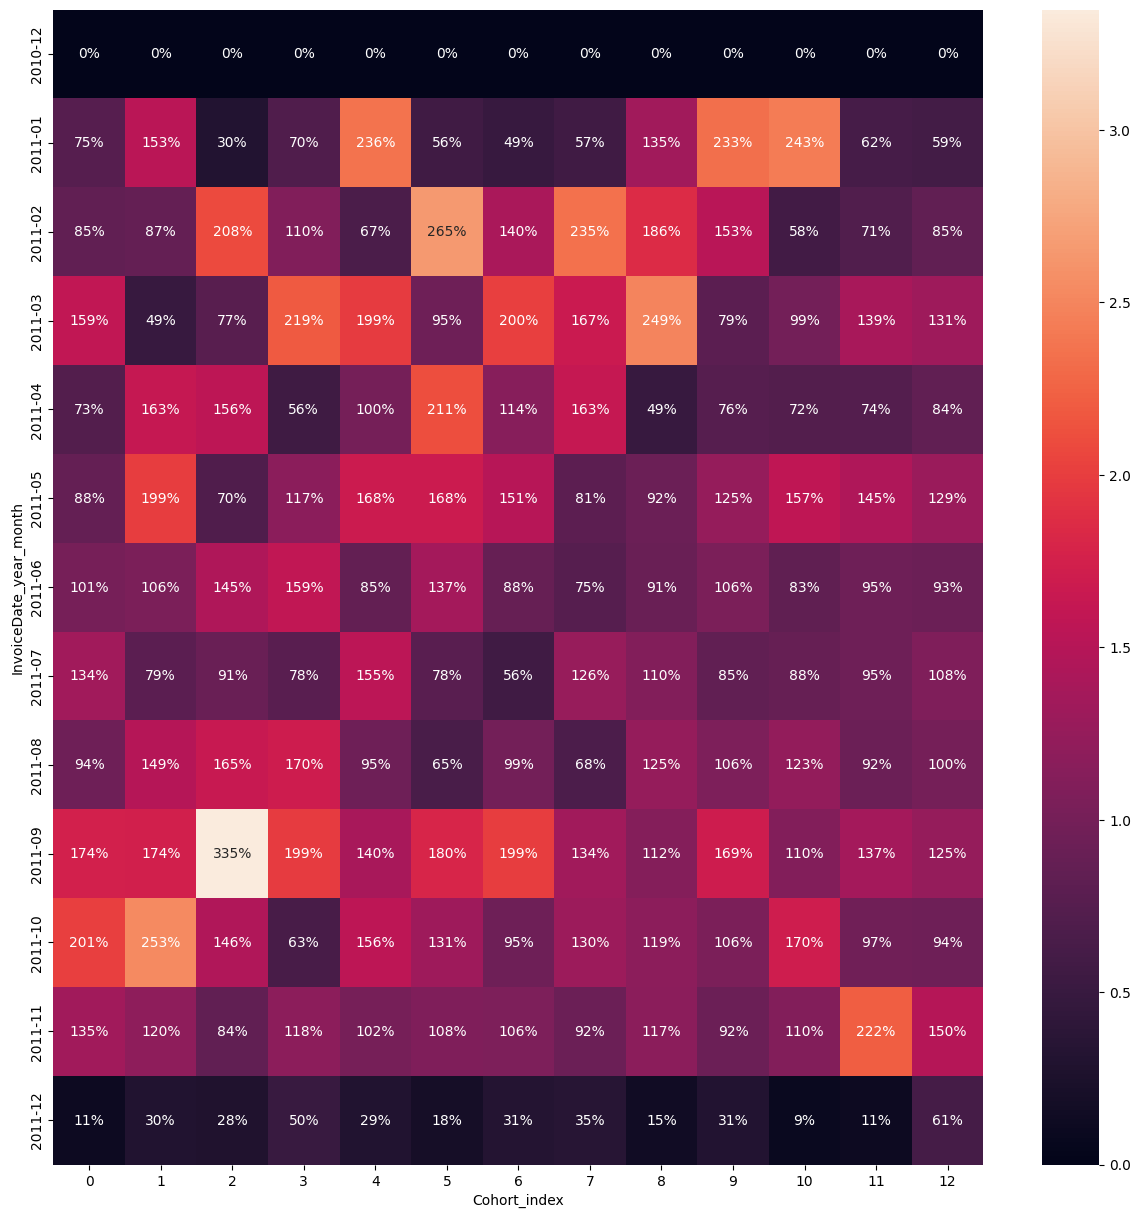

In [ ]:
plt.gcf().set_size_inches(15,15)
sns.heatmap(cohort_retention, annot=True, fmt='.0%')

(가장 최근인 2011년 12월 기준)
- 재주문율이 가장 낮은 코호트 인덱스 3순위 : 10 < 11,0 < 8
- 재주문율이 가장 높은 코호트 인덱스 3순위 : 12 > 3 > 7

- 재주문율이 1-3달 사이로 증감하는 패턴을 반복함. 즉, **1-3개월을 주기로 프로모션을 진행하고 있는 것으로 추측**됨



---

# Cohort별 주문 금액 시각화

> 평균 주문 금액

In [ ]:
cohort_sales.head(1)

,Cohort_index,Sales
0,0,15.197834


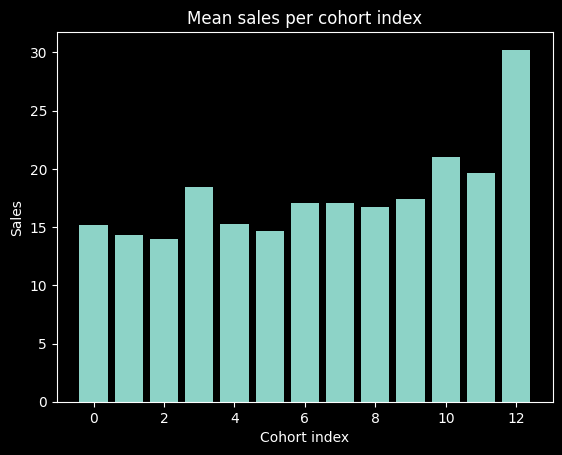

In [ ]:

plt.bar(cohort_sales['Cohort_index'], cohort_sales['Sales'])
plt.title('Mean sales per cohort index')
plt.xlabel('Cohort index')
plt.ylabel('Sales')
plt.show()

> 총 주문 금액

In [ ]:
cohort_sales_sum.head(1)

,Cohort_index,Sales
0,0,580572.461


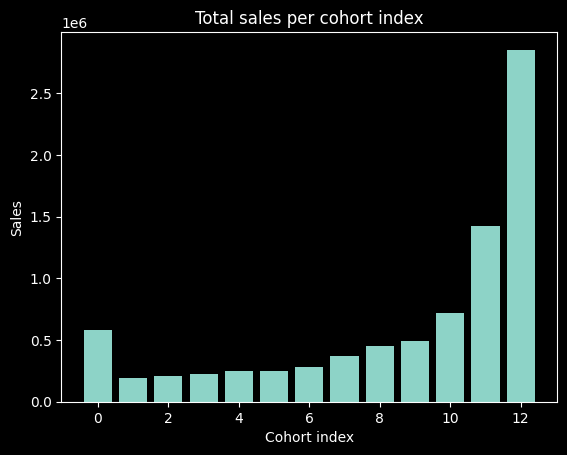

In [ ]:
plt.bar(cohort_sales_sum['Cohort_index'], cohort_sales_sum['Sales'])
plt.title('Total sales per cohort index')
plt.xlabel('Cohort index')
plt.ylabel('Sales')
plt.show()

총 주문 금액 상위 3순위 : 12 > 11 > 10
총 주문 금액 하위 3순위 : 1 < 2 < 3

평균 주문 금액 상위 3순위 : 12 > 10 > 3
평균 주문 금액 하위 3순위 : 2 < 1 < 5

코호트 인덱스 12, 10은 총 주문 금액과 평균 주문 금액이 모두 높은 반면,
코호트 인덱스 3은 평균 주문 금액에 비해 총 주문 금액이 낮은 편..

- 코호트 인덱스가 높을 수록, 주문 금액이 높음
- 코호트 인덱스가 낮은 '3'도 평균 주문 금액은 높으나, 총 주문 금액이 낮은 것으로 보아 아직 물품을 해당 사이트에서 자주 구매할 만큼 신뢰가 쌓이진 않았음.

---
# Cohort별 고객 수 파악

In [ ]:
cohort_counts.head(1)

,Cohort_index,0
0,0,1572


In [ ]:
cohort_counts.columns = ['Cohort_index', 'Counts']

In [ ]:
cohort_counts.head(1)

,Cohort_index,Counts
0,0,1572


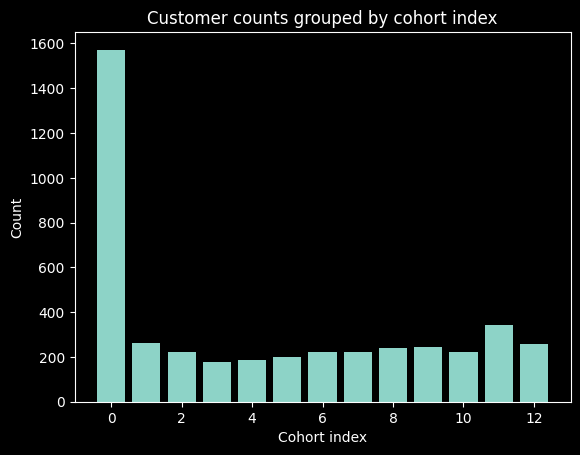

In [ ]:
plt.bar(cohort_counts['Cohort_index'], cohort_counts['Counts'])
plt.title('Customer counts grouped by cohort index')
plt.xlabel('Cohort index')
plt.ylabel('Count')
plt.show()

- 코호트 인덱스가 0인 고객이 압도적으로 많음
- 주문 금액 상위를 차지하는 코호트 인덱스 12, 13, 3의 고객 수는 현저히 낮음 ..
- **현재 시점에서는 신규 유저를 위한 혜택보다, 기존 유저를 잡아두기 위한 방법이 필요해보임**

---
# Cohort별 가입 국가 분석

In [ ]:
style_country = sorted_country_pivot.style.background_gradient(axis=0)
style_country

Country,United Kingdom,Germany,France,Spain,Belgium,Switzerland,Portugal,Italy,Finland,Austria,Norway,Netherlands,Australia,Denmark,Channel Islands,Cyprus,Sweden,Japan,Poland,USA,Canada,Unspecified,Israel,Greece,EIRE,Malta,United Arab Emirates,Bahrain,Czech Republic,Lithuania,Lebanon,RSA,Saudi Arabia,Singapore,Iceland,Brazil,European Community
Cohort_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1420.000000,26.000000,29.000000,11.000000,6.000000,7.000000,7.000000,8.000000,5.000000,4.000000,4.000000,4.000000,1.000000,2.000000,3.000000,4.000000,4.000000,3.000000,2.000000,3.000000,3.000000,1.000000,3.000000,3.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,238.000000,8.000000,2.000000,2.000000,0.000000,2.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2,195.000000,7.000000,10.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,157.000000,5.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4,172.000000,6.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,177.000000,5.000000,1.000000,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,201.000000,2.000000,5.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,203.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,224.000000,7.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


- 고객 수가 가장 많은 나라는 영국 > 독일 > 프랑스 순
- Cohort index가 0인 고객이 가장 많음
- Cohort index가 증가할 수록 고객 수가 감소하다가, Cohort index가 11이 될 때 증가하는 경향이 있음

# Cohort별 국가별 주문 수 분석

In [ ]:
style_country_order = sorted_country_order_pivot.style.background_gradient(axis=0)
style_country_order

Country,United Kingdom,Germany,France,EIRE,Spain,Netherlands,Belgium,Switzerland,Portugal,Australia,Norway,Italy,Channel Islands,Finland,Cyprus,Sweden,Austria,Denmark,Japan,Poland,USA,Israel,Unspecified,Singapore,Iceland,Canada,Greece,Malta,United Arab Emirates,European Community,RSA,Lebanon,Lithuania,Brazil,Czech Republic,Bahrain,Saudi Arabia
Cohort_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,33721.000000,686.000000,611.000000,0.000000,240.000000,53.000000,110.000000,583.000000,232.000000,30.000000,97.000000,267.000000,31.000000,132.000000,164.000000,92.000000,94.000000,17.000000,31.000000,17.000000,246.000000,207.000000,134.000000,0.000000,0.000000,16.000000,90.000000,45.000000,68.000000,0.000000,58.000000,45.000000,35.000000,32.000000,0.000000,17.000000,0.000000
1,12391.000000,262.000000,59.000000,0.000000,78.000000,0.000000,0.000000,85.000000,169.000000,10.000000,0.000000,20.000000,0.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.000000,0.000000,0.000000,135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
2,13369.000000,339.000000,834.000000,0.000000,8.000000,0.000000,0.000000,138.000000,0.000000,0.000000,0.000000,0.000000,35.000000,22.000000,0.000000,0.000000,0.000000,33.000000,65.000000,47.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,11157.000000,273.000000,164.000000,0.000000,121.000000,0.000000,41.000000,144.000000,86.000000,0.000000,0.000000,111.000000,0.000000,18.000000,0.000000,0.000000,34.000000,61.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,15142.000000,639.000000,189.000000,0.000000,0.000000,0.000000,211.000000,0.000000,0.000000,0.000000,297.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,15291.000000,658.000000,69.000000,0.000000,23.000000,0.000000,461.000000,0.000000,97.000000,0.000000,177.000000,0.000000,128.000000,0.000000,0.000000,43.000000,148.000000,114.000000,8.000000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,14356.000000,195.000000,532.000000,0.000000,110.000000,20.000000,239.000000,292.000000,377.000000,0.000000,0.000000,0.000000,88.000000,90.000000,3.000000,0.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,19880.000000,41.000000,910.000000,162.000000,195.000000,95.000000,77.000000,167.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,42.000000,0.000000,0.000000,52.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,25016.000000,663.000000,46.000000,0.000000,266.000000,0.000000,113.000000,18.000000,0.000000,101.000000,0.000000,0.000000,408.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


- 주문 수가 가장 많은 나라는 영국 > 독일 > 프랑스
- Cohort index가 10 이상이거나, 0인 고객에 대해 주문 수가 많은 경향이 포착됨
- **신규 고객이나 코어 고객층 외에는 주문수가 현저히 떨어지는 것을 알 수 있음**

# Cohort별 국가별 평균 주문 금액 분석

In [ ]:
style_country_mean_pivot= sorted_country_mean_pivot.style.background_gradient(axis=0)
style_country_mean_pivot

Country,Japan,Denmark,Finland,Germany,Australia,France,Switzerland,Sweden,Spain,Channel Islands,Belgium,Netherlands,United Kingdom,Portugal,Norway,Cyprus,Austria,Italy,EIRE,Poland,Israel,Canada,Greece,Lithuania,Unspecified,Singapore,Malta,Lebanon,Brazil,Bahrain,USA,United Arab Emirates,Iceland,Czech Republic,European Community,RSA,Saudi Arabia
Cohort_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,54.618387,34.035294,25.226667,18.073834,58.698667,15.038543,26.617736,18.451630,11.066625,115.491613,18.956818,19.282075,14.456581,16.179526,56.356598,9.372073,21.070851,20.246105,0.000000,23.635294,23.113043,45.396250,41.439333,47.458857,4.077836,0.000000,20.122222,37.641778,35.737500,32.258824,1.560772,27.974706,0.000000,0.000000,0.000000,17.281207,0.000000
1,0.000000,0.000000,19.857500,52.104695,40.190000,17.009831,26.432353,0.000000,17.171538,0.000000,0.000000,0.000000,13.166586,22.599172,0.000000,0.000000,0.000000,21.891000,0.000000,0.000000,0.000000,21.778074,0.000000,0.000000,18.030345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.117000
2,45.371077,10.610909,23.243636,15.710118,0.000000,16.778705,24.689783,0.000000,25.975000,46.218000,0.000000,0.000000,13.290863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.626809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.932667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,20.112787,25.301111,24.020183,0.000000,19.827622,80.715903,0.000000,4.989339,0.000000,20.738780,0.000000,17.419928,18.649651,0.000000,0.000000,61.185000,18.540450,0.000000,19.731034,0.000000,0.000000,17.517500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.176230,0.000000,0.000000
4,367.200000,0.000000,0.000000,19.875931,0.000000,16.493228,0.000000,0.000000,0.000000,0.000000,17.644550,0.000000,14.485852,0.000000,32.896061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,872.130000,36.597807,0.000000,13.346170,0.000000,15.267971,0.000000,21.837674,54.698261,18.537969,22.767028,0.000000,13.280245,28.779278,28.279435,0.000000,25.879189,0.000000,0.000000,0.000000,51.391860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,217.496944,24.676000,16.956667,0.000000,18.347914,20.562705,0.000000,23.647545,21.464091,16.221046,23.183000,16.493720,11.214058,0.000000,65.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.511829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,27.448889,24.962308,0.000000,20.267317,0.000000,25.873505,24.558623,0.000000,23.035026,0.000000,22.183377,16.120421,16.357958,0.000000,0.000000,40.450000,0.000000,30.054286,26.718889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,26.257333,22.200121,21.777228,18.181087,23.186667,0.000000,17.535000,22.260049,25.155487,0.000000,16.326679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


- 평균 주문 금액이 높은 국가 3순위는 일본 > 덴마크 > 핀란드
- 의외로 고객 수와 주문 수 상위 국가인 영국, 프랑스는 평균 구매 금액이 그리 높지 않은 것을 알 수 있음
- 이를 미루어 보아, 가끔씩 구매해도 되는

# 인사이트

> 재주문율 분석

- 재주문율이 1-3달 사이로 증감하는 패턴을 반복함.
- 재주문율이 가장 높은 코호트 인덱스 : 12 > 3 > 7
- 재주문율이 가장 낮은 코호트 인덱스 : 10 < 11,0 < 8

 ➡ **1-3개월을 주기로 프로모션을 진행하고 있는 것으로 간주됨**

---

> Cohort별 평균 주문 금액 분석

- 코호트 인덱스가 높은 **"코어 고객"일 수록 평균 주문 금액이 높은 경향을 보임**
- 반면, 코호트 인덱스가 낮은 '3'은 그나마 평균 주문 금액이 높지만, 총 금액은 높지 않음

 ➡ 아직 물품을 해당 사이트에서 많이 구매할 만큼 **신뢰가 쌓이진 않았음**
---

> Cohort별 고객 수 분석

- 코호트 인덱스가 0인 신규 고객의 수가 압도적으로 많은 반면, **코호트 인덱스 12, 13, 3의 고객 수는 현저히 낮음**
- 즉, **평균 주문 금액의 대다수를 차지하는 고객의 수가 오히려 적은 것**으로 나타남

 ➡ 신규 유저 혜택만 받고 바로 이탈하는 것으로 추정됨
---

> Cohort별 주문 수 분석

- Cohort index가 10 이상이거나, 0인 고객에 대해 주문 수가 많은 경향이 포착됨

 ➡  **즉, 신규 고객이나 코어 고객층 외에는 주문수가 현저히 떨어지는 것을 알 수 있음**

---

> Cohort별 + 국가별 분석

- 고객 수가 가장 많은 나라는 영국 > 독일 > 프랑스 순
- 주문 수가 가장 많은 나라는 영국 > 독일 > 프랑스
순
- 평균 주문 금액이 높은 나라는 일본 > 덴마크 > 핀란드 순 (하지만 세 나라의 주문 수는 그리 높지 않음)

 ➡ Zeta에서는 일상 속에서 자주 소비되는 "필수재"가 주로 판매되는 것으로 간주됨


---

# 전략
- 평균 주문 금액과 주문 수가 많은 *'코어 고객'*을 양성하는 것이 중요함. 즉, 할인 프로모션만 제공하기 보다는, Zeta를 믿고 사용할 수 있도록 고객들로 하여금 신뢰를 심어줄 수 있는 대책을 마련해야 함. 예를 들어,
  + 판매하는 제품들의 품질을 개선하기
  + 배송 등에서 컴플레인이 있지는 않았는지 점검하기


- 고급 소비재보다는 일상용품(= 생활용품, 필수재)을 주력으로 판매하는 것을 제안함.

# 질문
1) 신입으로 취준하는 입장에서 인사이트와 전략을 이정도로 뽑으면 되는지 궁금합니다. 뭔가 더욱 전문적인 해석 방법이 있진 않을까 고민입니다.